### **PREDICCIÓN DE CONVERSIÓN EN CAMPAÑAS DE MARKETING DIGITAL CON MACHINE LEARNING**
### **Introducción del Proyecto**

**Tema del Proyecto:**  
El proyecto busca resolver un problema crucial en marketing digital: identificar qué usuarios tienen mayor probabilidad de conversión en campañas publicitarias. Utilizaremos un enfoque de Machine Learning para analizar un dataset que incluye 8000 registros y 20 variables relacionadas con clientes, campañas y comportamiento digital. Este modelo ayudará a optimizar decisiones estratégicas y mejorar el retorno de inversión.

---

**Dataset:**  
[Predict Conversion in Digital Marketing](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data)  
- **Registros:** 8000 (sin valores nulos).  
- **Columnas:** 20.  

---

**Variables principales:** 

#### **Demográficas:**  
- `Age`: Edad del cliente, una variable numérica que puede influir en los patrones de compra y conversión.  
- `Gender`: Género del cliente (`Male`, `Female`), relevante para segmentación de campañas.  
- `Income`: Ingresos anuales del cliente, en $, indicando su capacidad adquisitiva y preferencia por ciertos productos o servicios.  

#### **Campañas publicitarias:**  
- `CampaignChannel`: Canal de distribución de la campaña (`Social Media`, `Email`, `PPC`, `Referral`, `SEO`), proporcionando información sobre dónde se alcanzaron los clientes.  
- `CampaignType`: Tipo de campaña (`Awareness`, `Retention`, `Conversion`, `Consideration`), reflejando el propósito estratégico de la acción publicitaria.  
- `AdSpend`: Cantidad de dinero $ gastada en publicidad para cada cliente (valor continuo).  

#### **Interacciones digitales:**  
- `ClickThroughRate`: Porcentaje de clics que los clientes realizaron sobre los anuncios mostrados, un indicador de interés.  
- `ConversionRate`: Porcentaje de usuarios que completaron una acción específica tras interactuar con los anuncios.  
- `WebsiteVisits`: Número de visitas al sitio web, representando el nivel de interés generado.  
- `PagesPerVisit`: Número promedio de páginas vistas por visita al sitio, reflejando el grado de compromiso del usuario.  
- `TimeOnSite`: Tiempo promedio (en minutos) que los usuarios permanecieron en el sitio web, un indicador del interés y la exploración de contenido.  
- `SocialShares`: Cantidad de veces que los usuarios compartieron contenido de la campaña en redes sociales, indicando viralidad e impacto orgánico.  
- `EmailOpens`: Número de correos electrónicos abiertos por los usuarios, mostrando efectividad de las campañas de email marketing.  
- `EmailClicks`: Número de clics realizados dentro de correos electrónicos, reflejando el nivel de interés en los enlaces promocionados.  

#### **Historial del cliente:**  
- `PreviousPurchases`: Número de compras anteriores realizadas por el cliente, útil para identificar patrones de lealtad.  
- `LoyaltyPoints`: Puntos acumulados en programas de fidelización, un reflejo del compromiso del cliente con la marca.  

#### **Plataformas y herramientas:**  
- `AdvertisingPlatform`: Valor único en todo el dataset (`IsConfid`), descartado por falta de variabilidad.  
- `AdvertisingTool`: Valor único en todo el dataset (`ToolConfid`), descartado por falta de información relevante.  

#### **Target:**  
- **`Conversion`:** Variable objetivo binaria (Entendida como: realiza (1) o no (0) la acción deseada por la campaña de marketing):  
  - `1`: El cliente realizó la conversión.  
  - `0`: El cliente no realizó la conversión.  

**Métrica: Recall**
---

**Datos clave del dataset:**  
- **ConversionRate promedio:** Aproximadamente el 10%, lo que destaca la necesidad de segmentar audiencias y optimizar campañas para mejorar esta métrica.  

---

**Objetivo:**  
Desarrollar un modelo de clasificación binaria para predecir la probabilidad de conversión de cada cliente. Este modelo permitirá optimizar recursos publicitarios y diseñar estrategias más efectivas, priorizando canales y audiencias de mayor impacto.

---

**Metodología:**  
1. **Exploración inicial de datos (EDA):**  
   - Limpieza de valores irrelevantes (`AdvertisingPlatform`, `AdvertisingTool`).  
   - Identificación de tendencias clave en las tasas de conversión y comportamientos digitales.  

2. **Prueba de Modelos:**  
   - Algoritmos como Random Forest, XGBoost y regresión logística serán evaluados.  
   - Métricas clave: ROC-AUC, F1-Score y precisión.  

3. **Optimización:**  
   - Feature engineering para transformar y generar variables adicionales.  
   - Selección del modelo final con el mejor balance entre precisión y sensibilidad.  

---

**Impacto esperado:**  
- **Ahorro en costos:** Priorizar clientes con mayor probabilidad de conversión reducirá el gasto en campañas ineficientes.  
- **Mejora del ROI:** Identificar los canales y campañas más efectivos permitirá maximizar la rentabilidad de las inversiones.  
- **Toma de decisiones basada en datos:** El modelo guiará estrategias comerciales y publicitarias más informadas.

---

**Siguientes pasos:**  
- Completar el análisis exploratorio y visualización de datos.  
- Entrenar y evaluar modelos para seleccionar el más robusto.  
- Presentar resultados y recomendaciones en términos de impacto comercial y viabilidad técnica.  


### **INSTALL**

In [33]:
#!pip install imbalanced-learn
#!pip install shap

### **IMPORTS**

In [34]:
# === Standard Libraries ===
import re  # Trabajo con expresiones regulares
import math  # Funciones matemáticas
import warnings  # Manejo de advertencias

# === Data Manipulation and Analysis ===
import pandas as pd  # Manejo y análisis de datos estructurados
import numpy as np  # Operaciones numéricas y manejo de arrays

# === Visualization ===
import matplotlib.pyplot as plt  # Creación de gráficos básicos
from mpl_toolkits.mplot3d import Axes3D  # Gráficos 3D
import seaborn as sns  # Gráficos estadísticos y estilos
sns.set_style('whitegrid')  # Estilo de gráficos para seaborn

# === Model Selection and Preprocessing ===
from sklearn.model_selection import (
    train_test_split,  # División de datos en conjuntos de entrenamiento y prueba
    GridSearchCV,  # Búsqueda de hiperparámetros con validación cruzada
    StratifiedKFold  # Validación cruzada estratificada
)
from sklearn.preprocessing import (
    StandardScaler,  # Escalado de características
    LabelEncoder  # Codificación de etiquetas categóricas
)

# === Pipeline ===
from sklearn.pipeline import Pipeline  # Construcción de pipelines para preprocesamiento y modelado

# === Class Imbalance Handling ===
from imblearn.combine import SMOTETomek  # SMOTE + Tomek Links para balanceo de datos
from imblearn.over_sampling import SMOTE  # SMOTE para sobremuestreo

# === Machine Learning Models ===
from sklearn.ensemble import (
    RandomForestClassifier,  # Clasificador Random Forest
    GradientBoostingClassifier,  # Clasificador Gradient Boosting
    StackingClassifier,  # Clasificador basado en apilamiento
    RandomForestRegressor,  # Regresor Random Forest
    GradientBoostingRegressor  # Regresor Gradient Boosting
)
from xgboost import XGBClassifier, XGBRegressor  # Clasificador y regresor XGBoost
import xgboost as xgb  # Alias para usar modelos XGBoost fácilmente

# === Metrics and Evaluation ===
from sklearn.metrics import (
    classification_report,  # Reporte de métricas para clasificación
    confusion_matrix,  # Matriz de confusión
    roc_auc_score,  # Métrica AUC-ROC
    f1_score,  # F1-Score
    recall_score,  # Recall (Sensibilidad)
    precision_score,  # Precisión
    mean_absolute_error,  # MAE (Error absoluto medio) para regresión
    mean_squared_error  # MSE (Error cuadrático medio) para regresión
)

# === Clustering ===
from sklearn.cluster import KMeans  # Algoritmo de clustering K-Means
from sklearn.metrics import (
    silhouette_samples,  # Evaluación de silueta para cada punto
    silhouette_score  # Puntuación general de silueta para el modelo
)

# === Dimensionality Reduction ===
from sklearn.decomposition import PCA  # Análisis de componentes principales (PCA)

# === Utilities ===
from sklearn.utils.class_weight import compute_class_weight  # Cálculo de pesos para clases desbalanceadas
import joblib  # Guardar y cargar modelos entrenados

# Limpieza de redundancias y organización:
# - Se añadió explícitamente `XGBClassifier` para destacar su uso.
# - Se eliminó duplicación de módulos.
# - Estructura clara por categorías.


### **CONFIGURACIONES**

In [35]:
# Mostrar todas las columnas de un DataFrame
pd.set_option('display.max_columns', None)

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **CARGA DE DATOS Y PRIMERAS EXPLORACIONES**

In [36]:
# Cargar los datos
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

In [37]:
# Exportar el DataFrame a un archivo Excel
#df.to_excel('digital_marketing_campaign_dataset.xlsx', index=False)

In [38]:
df.head(100)

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0         8000   56  Female  136912    Social Media    Awareness  6497.870068   
1         8001   69    Male   41760           Email    Retention  3898.668606   
2         8002   46  Female   88456             PPC    Awareness  1546.429596   
3         8003   32  Female   44085             PPC   Conversion   539.525936   
4         8004   60  Female   83964             PPC   Conversion  1678.043573   
..         ...  ...     ...     ...             ...          ...          ...   
95        8095   42  Female  134479             PPC   Conversion  1772.907833   
96        8096   62  Female   77429        Referral    Awareness  7909.335039   
97        8097   58    Male   23134             SEO    Retention  5091.776674   
98        8098   46  Female  130995             PPC   Conversion  5175.874779   
99        8099   32    Male   63199        Referral    Awareness  3684.910592   

    ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
0           0.043919        0.088031              0       2.399017   
1           0.155725        0.182725             42       2.917138   
2           0.277490        0.076423              2       8.223619   
3           0.137611        0.088004             47       4.540939   
4           0.252851        0.109940              0       2.046847   
..               ...             ...            ...            ...   
95          0.098736        0.152312             40       4.783479   
96          0.055027        0.160091              0       4.022981   
97          0.190800        0.030221             24       9.938338   
98          0.180008        0.100499             15       7.901173   
99          0.108024        0.189666             14       2.860981   

    TimeOnSite  SocialShares  EmailOpens  EmailClicks  PreviousPurchases  \
0     7.396803            19           6            9                  4   
1     5.352549             5           2            7                  2   
2    13.794901             0          11            2                  8   
3    14.688363            89           2            2                  0   
4    13.993370             6           6            6                  8   
..         ...           ...         ...          ...                ...   
95    5.087264            76          18            5                  8   
96    5.796379            52          11            0                  3   
97    1.303695            13           8            7                  4   
98   11.429444             9           5            0                  4   
99    9.268680            77           8            1                  4   

    LoyaltyPoints AdvertisingPlatform AdvertisingTool  Conversion  
0             688            IsConfid      ToolConfid           1  
1            3459            IsConfid      ToolConfid           1  
2            2337            IsConfid      ToolConfid           1  
3            2463            IsConfid      ToolConfid           1  
4            4345            IsConfid      ToolConfid           1  
..            ...                 ...             ...         ...  
95             72            IsConfid      ToolConfid           1  
96           3482            IsConfid      ToolConfid           1  
97            205            IsConfid      ToolConfid           1  
98           2595            IsConfid      ToolConfid           1  
99           3514            IsConfid      ToolConfid           1  

[100 rows x 20 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [40]:
df.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

In [41]:
# Iterar por cada columna y obtener los valores únicos
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos de cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}")
    print("-" * 50)

Columna: CustomerID
Valores únicos: [ 8000  8001  8002 ... 15997 15998 15999]
--------------------------------------------------
Columna: Age
Valores únicos: [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
--------------------------------------------------
Columna: Gender
Valores únicos: ['Female' 'Male']
--------------------------------------------------
Columna: Income
Valores únicos: [136912  41760  88456 ...  24849 125471 107862]
--------------------------------------------------
Columna: CampaignChannel
Valores únicos: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
--------------------------------------------------
Columna: CampaignType
Valores únicos: ['Awareness' 'Retention' 'Conversion' 'Consideration']
--------------------------------------------------
Columna: AdSpend
Valores únicos: [6497.87006842 3898.66860568 1546.4295958  ... 4609.53463542 9476.10635405
 7743.6

In [42]:
# Iterar por cada columna y mostrar los value_counts
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("-" * 50)


Columna: CustomerID
CustomerID
8000     1
13329    1
13342    1
13341    1
13340    1
        ..
10661    1
10660    1
10659    1
10658    1
15999    1
Name: count, Length: 8000, dtype: int64
--------------------------------------------------
Columna: Age
Age
64    187
62    182
43    178
66    178
34    177
49    173
45    173
52    172
40    170
42    167
46    165
39    165
25    162
38    162
21    160
54    160
30    157
32    157
57    157
37    156
35    155
51    155
68    155
23    154
28    153
36    153
20    151
41    151
47    150
61    150
19    150
53    149
50    149
18    148
29    148
31    148
33    148
56    147
69    147
59    146
58    144
26    143
55    143
63    140
22    139
60    139
67    137
65    137
27    136
24    129
44    128
48    120
Name: count, dtype: int64
--------------------------------------------------
Columna: Gender
Gender
Female    4839
Male      3161
Name: count, dtype: int64
--------------------------------------------------
Columna: Inco

### **LIMPIEZA DE DATOS**

In [43]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'])

In [44]:
# Identificar duplicados
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Mostrar filas duplicadas
if duplicados.sum() > 0:
    print("Filas duplicadas:")
    print(df[duplicados])

# Eliminar duplicados si SE encuentran
df = df.drop_duplicates()

# Verificar que se eliminaron los duplicados
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")


Número de filas duplicadas: 0
Número de filas después de eliminar duplicados: 8000


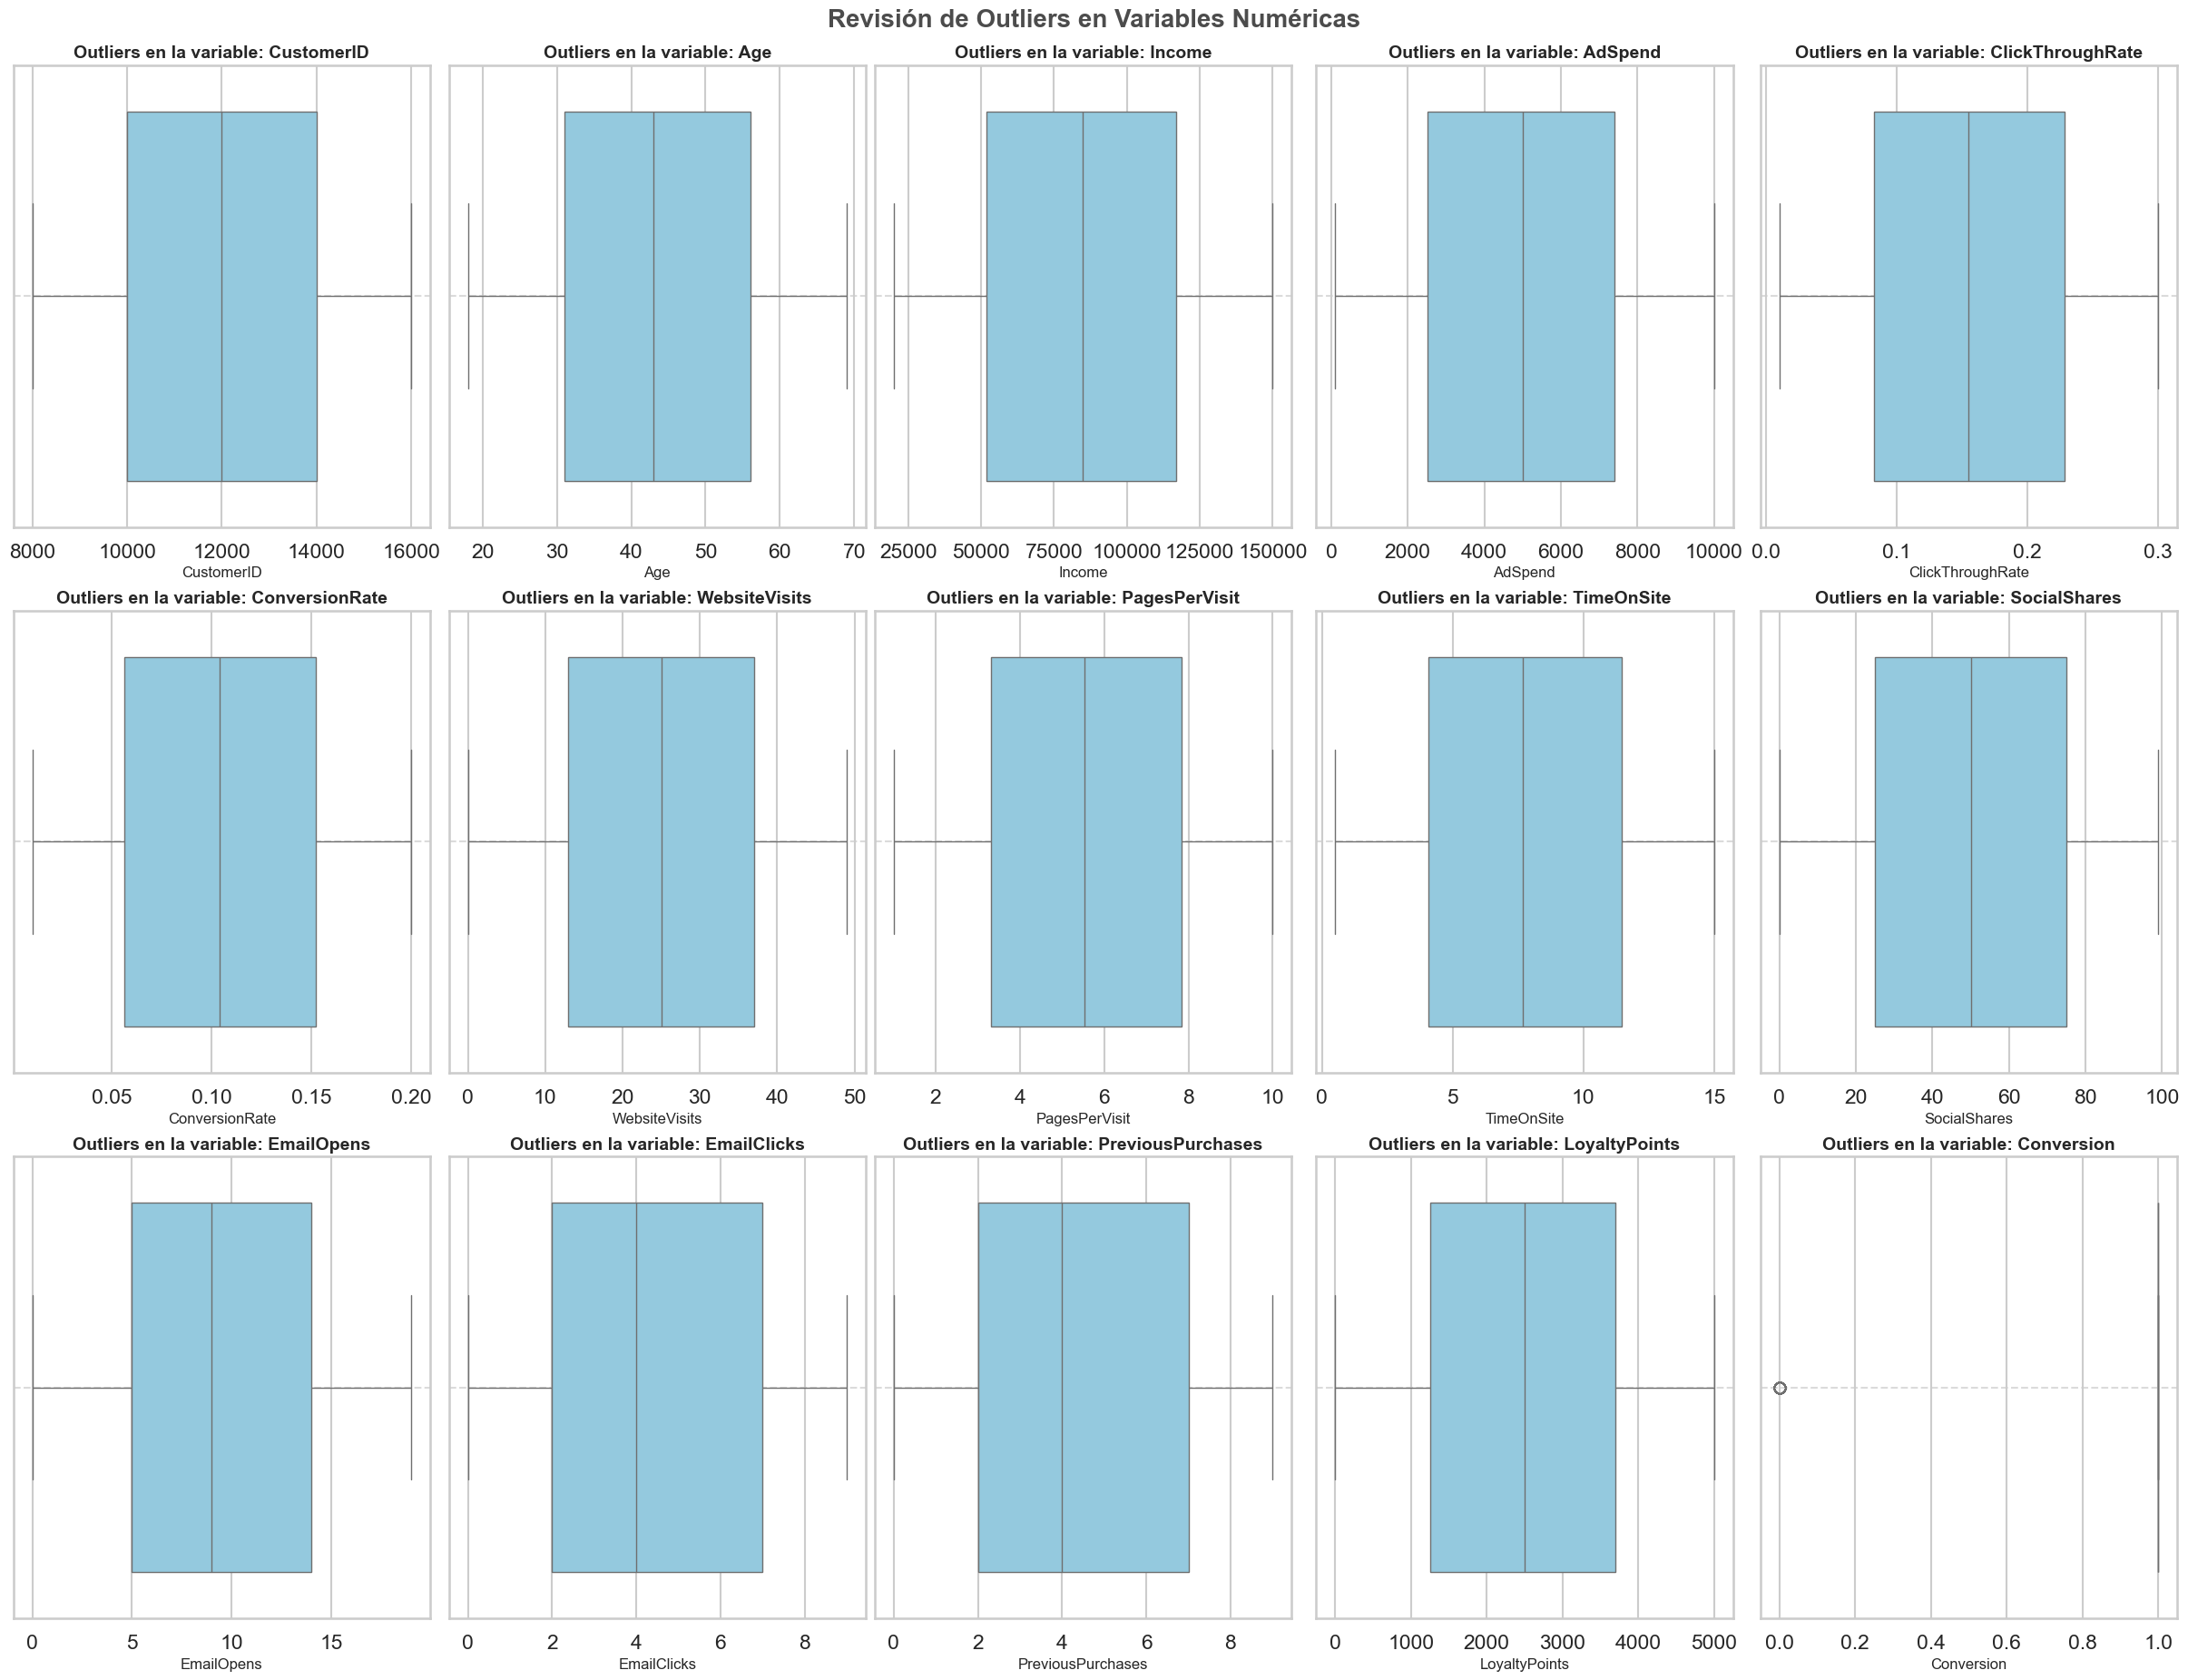

In [45]:
# Filtrar las variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Número de columnas por fila
columns_per_row = 5

# Número total de variables numéricas
total_variables = len(variables_numericas)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Crear boxplots
for i, var in enumerate(variables_numericas):
    sns.boxplot(data=df, x=var, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Outliers en la variable: {var}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Revisión de Outliers en Variables Numéricas', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.02)

plt.show()



### **EDA**

C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)


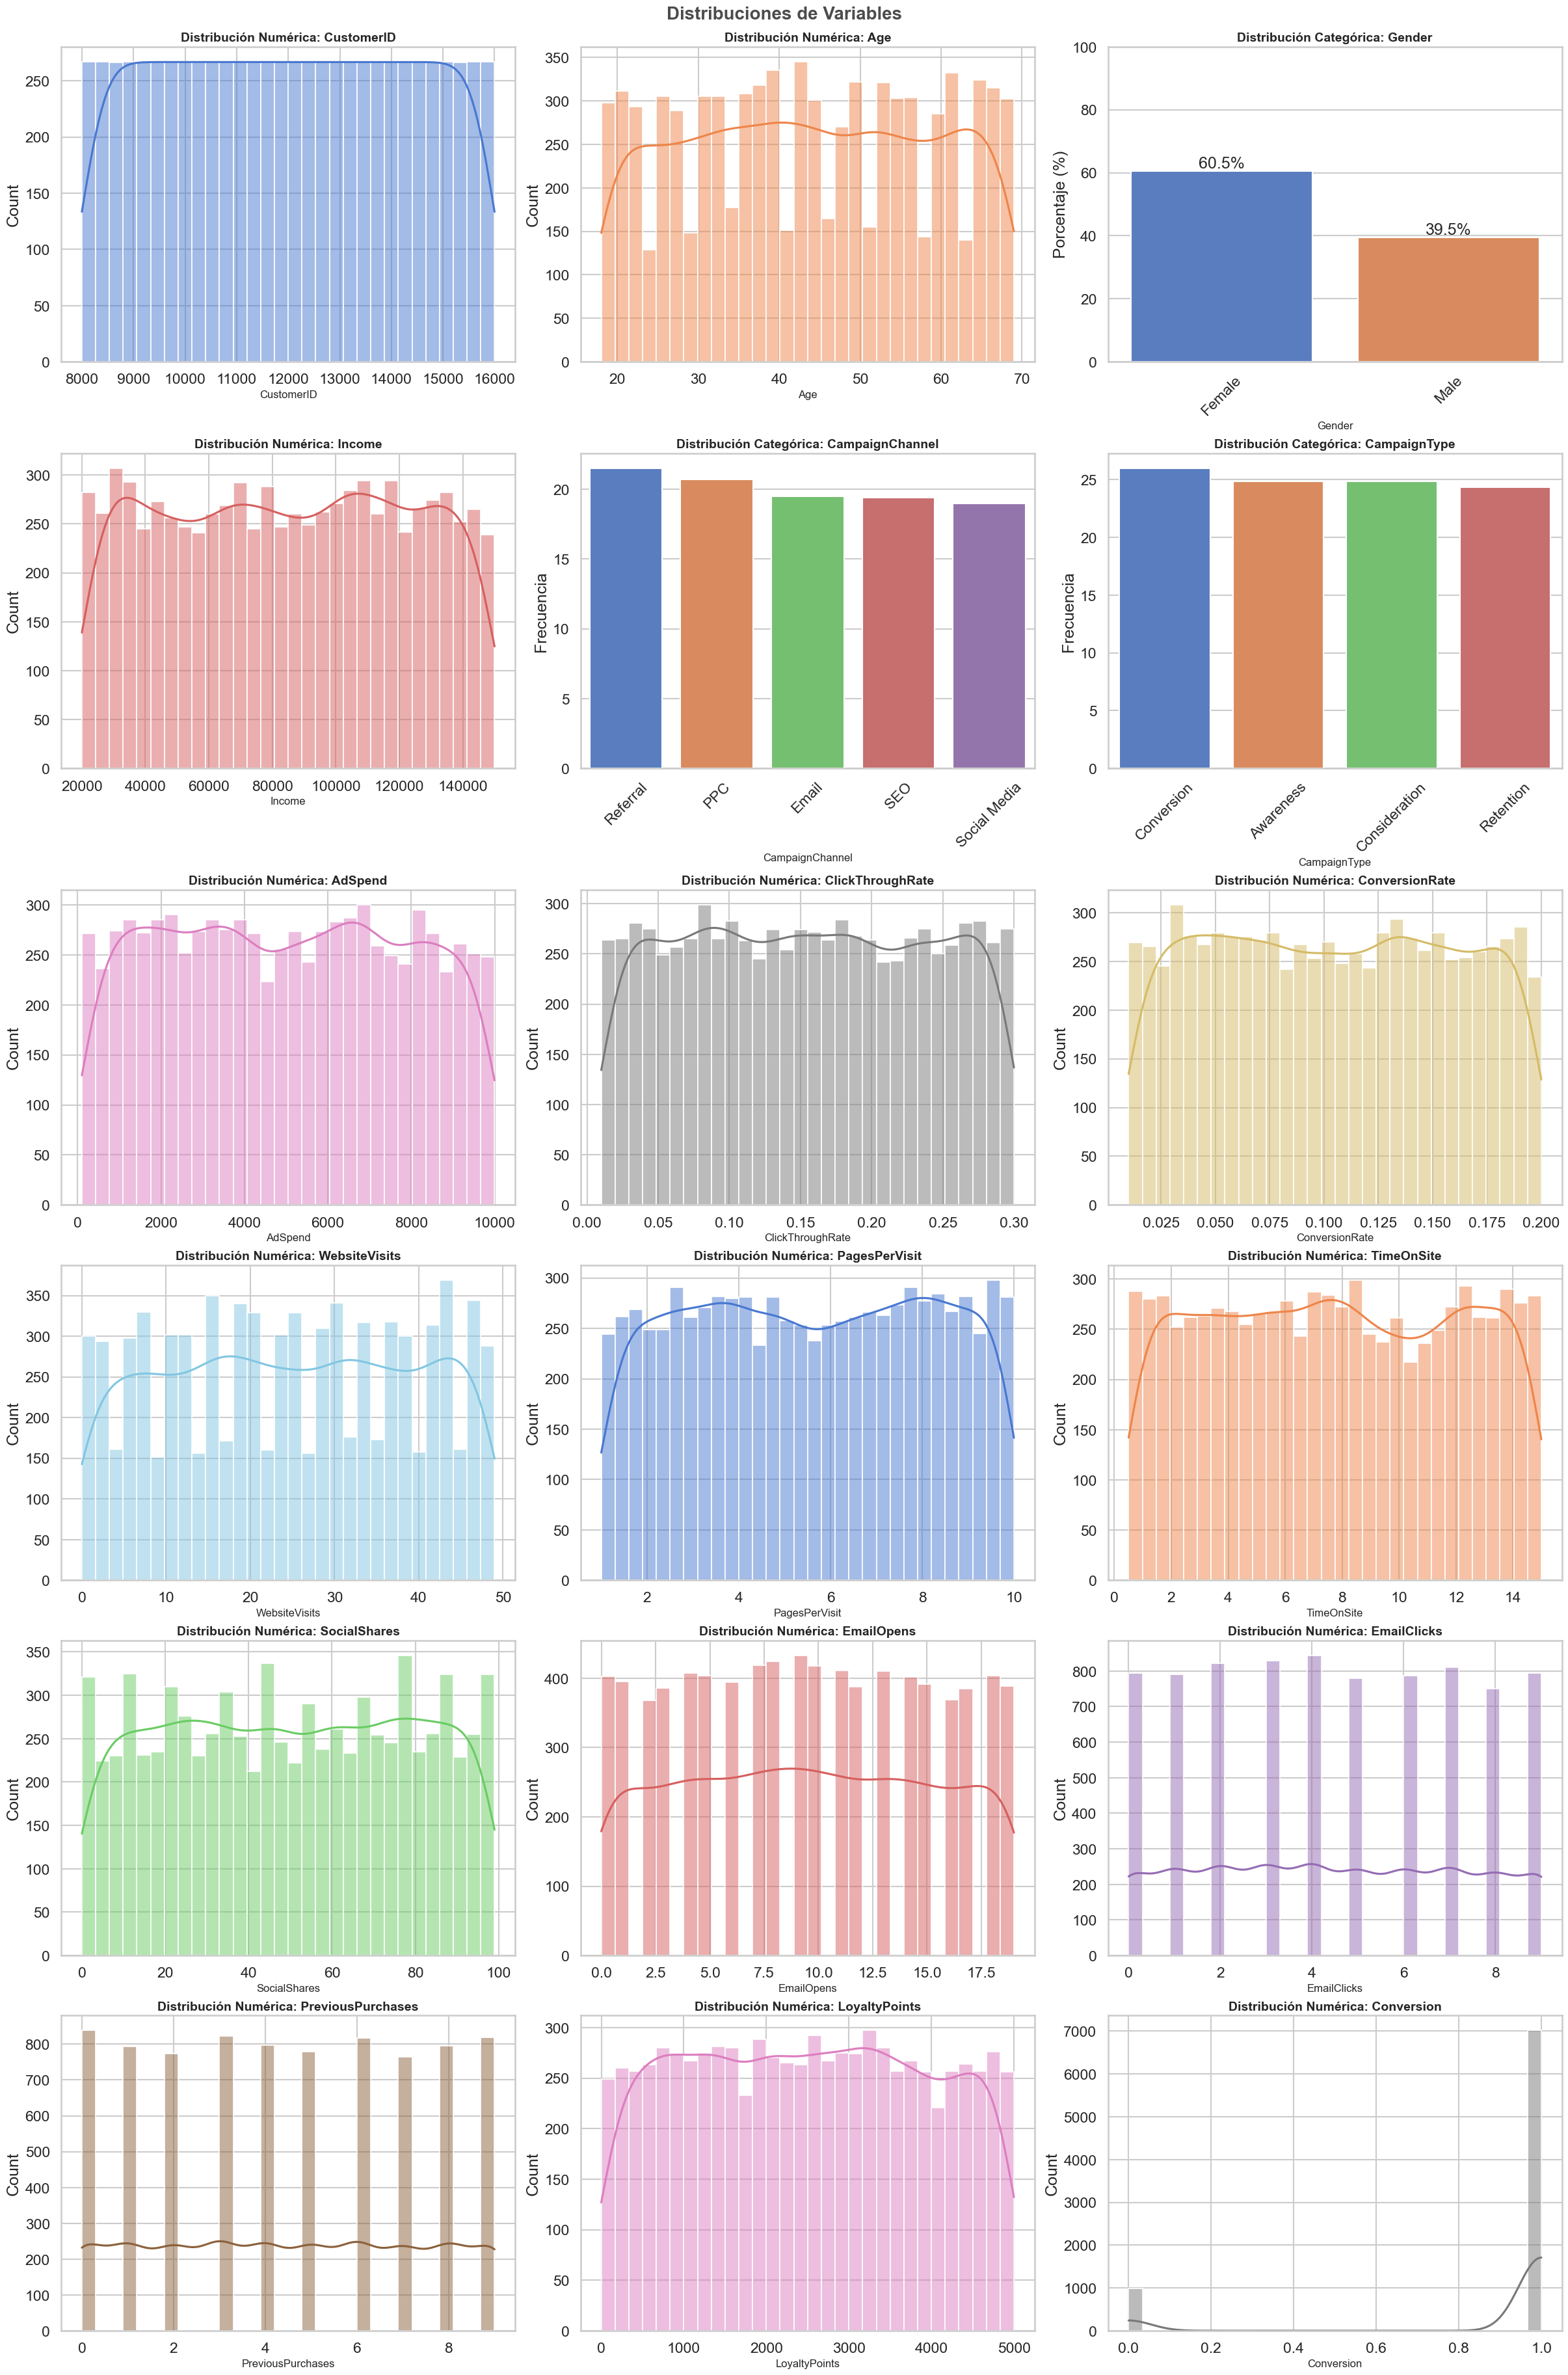

In [46]:
# Configuración general
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Número de columnas por fila
columns_per_row = 3

# Número total de columnas
total_columns = len(df.columns)

# Número de filas necesarias
rows = math.ceil(total_columns / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Colores personalizados
palette = sns.color_palette("muted")

# Visualizar cada columna
for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].dtype in ['int64', 'float64']:
        # Variables numéricas
        sns.histplot(df[column], kde=True, bins=30, ax=ax, color=palette[i % len(palette)])
        ax.set_title(f'Distribución Numérica: {column}', fontsize=14, fontweight='bold')
    elif df[column].dtype == 'object' or df[column].dtype == 'bool':
        # Variables categóricas
        value_counts = df[column].value_counts(normalize=True) * 100  # Porcentajes
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
        ax.set_title(f'Distribución Categórica: {column}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Porcentaje (%)' if column == "Gender" else 'Frecuencia')
        ax.set_ylim(0, 100 if column == "Gender" else None)
        
        # Agregar etiquetas de porcentaje solo para 'Gender'
        if column == "Gender":
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%')
        
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column, fontsize=12)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribuciones de Variables', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.01)

plt.show()

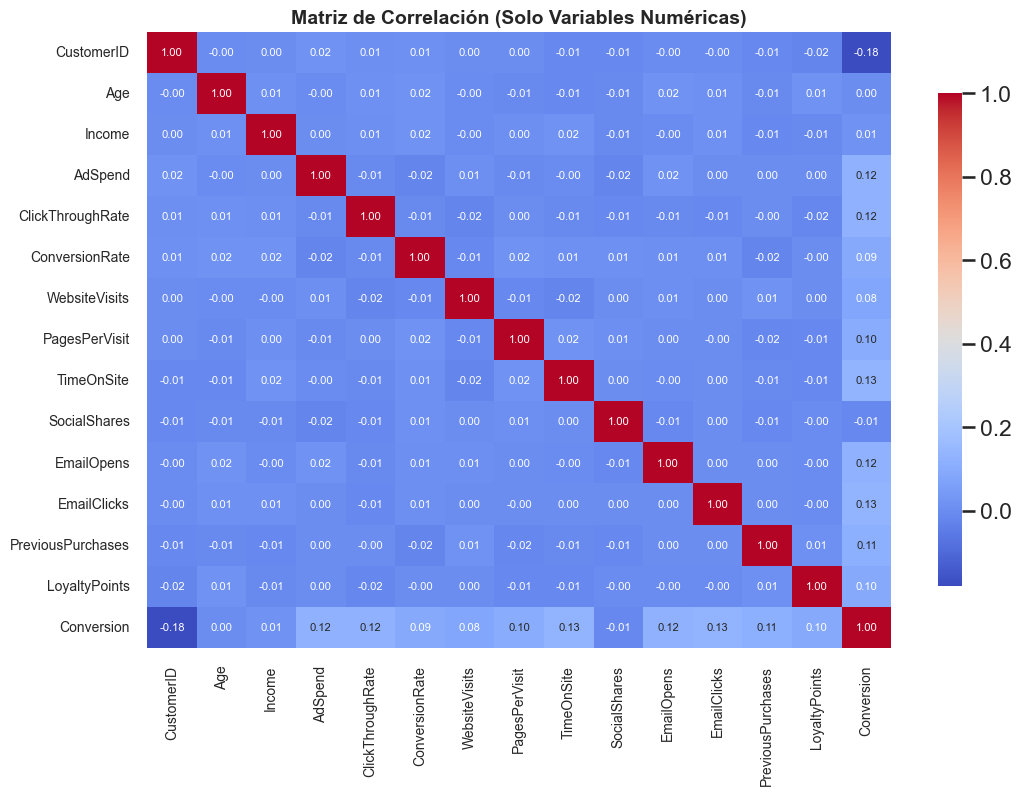

In [47]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mapa de calor con texto y números más pequeños
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8},  # Tamaño del texto en los números
    cbar_kws={"shrink": 0.8}  # Reducir la barra de color
)
plt.title('Matriz de Correlación (Solo Variables Numéricas)', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

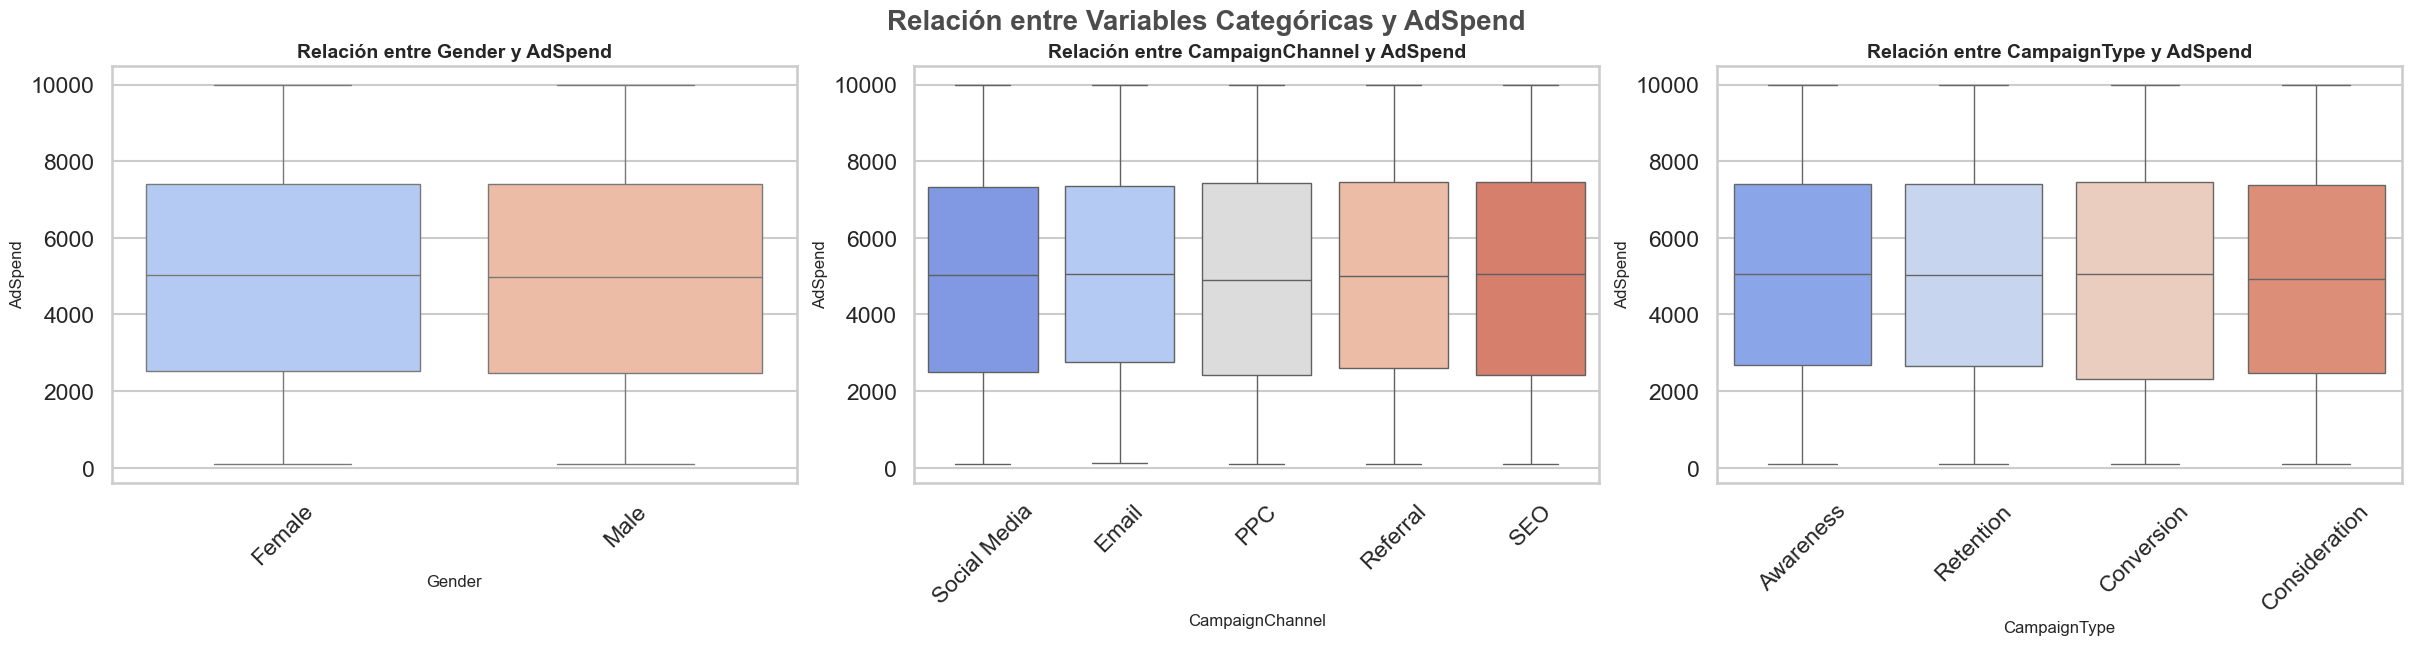

In [48]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Variable numérica a analizar
numeric_var = 'AdSpend'

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar boxplots
for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=cat_var, y=numeric_var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Relación entre {cat_var} y {numeric_var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel(numeric_var, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Variables Categóricas y AdSpend', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()

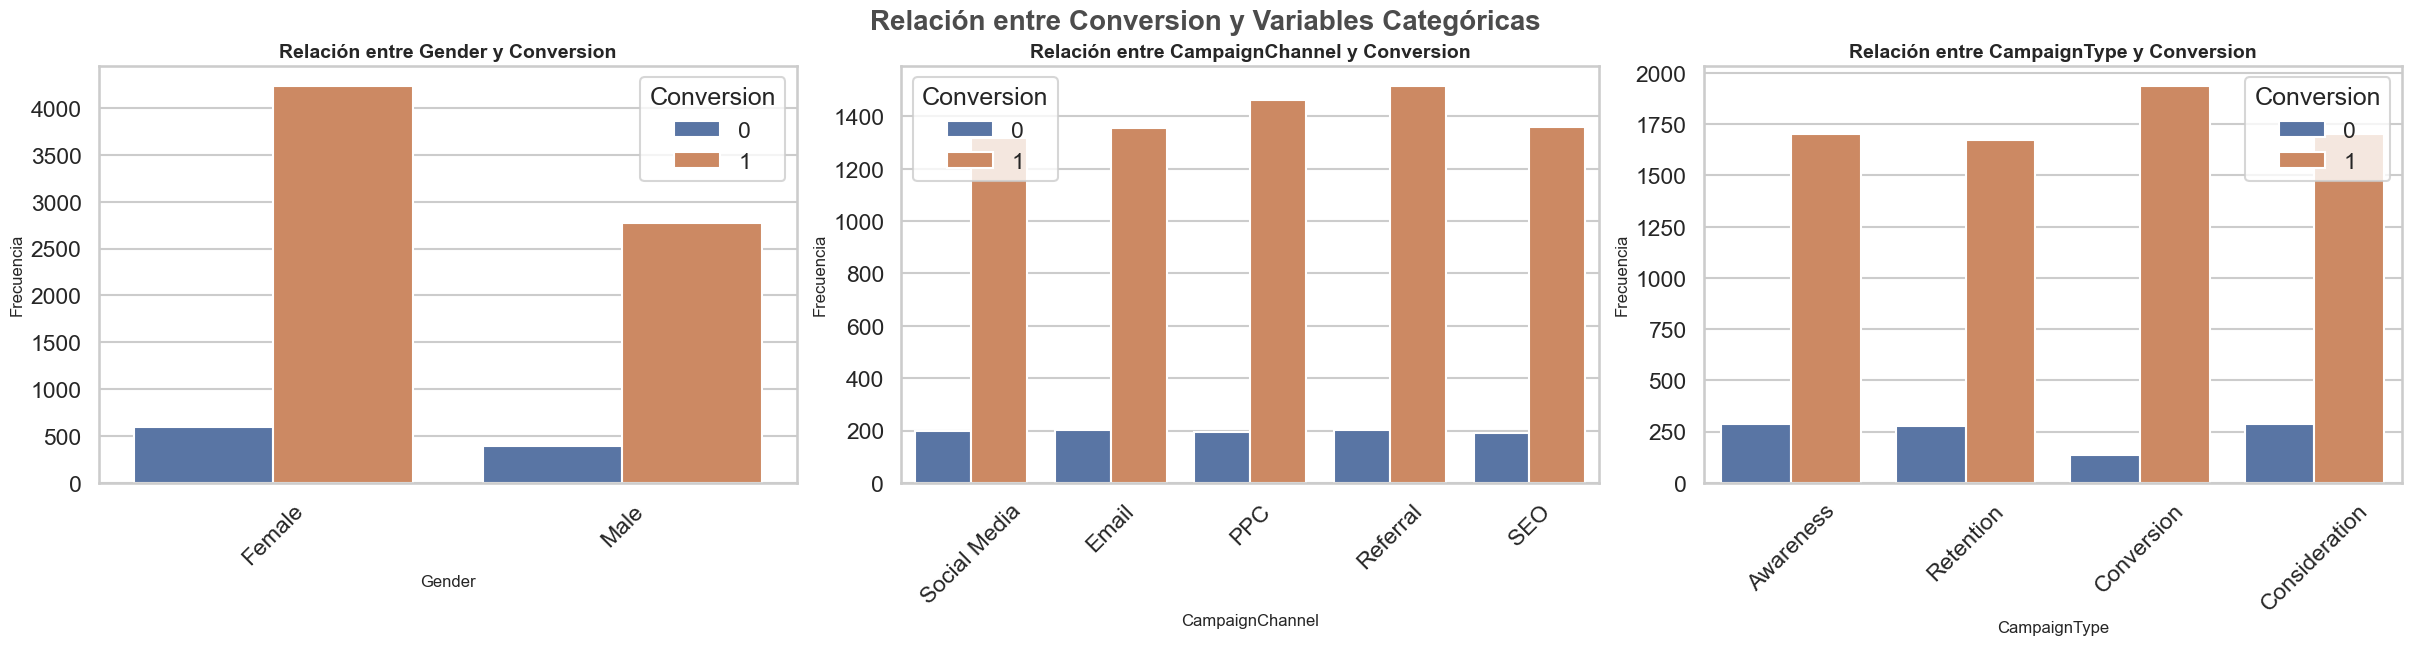

In [49]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar countplots
for i, cat_var in enumerate(categorical_vars):
    sns.countplot(data=df, x=cat_var, hue='Conversion', ax=axes[i])
    axes[i].set_title(f'Relación entre {cat_var} y Conversion', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Conversion y Variables Categóricas', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()



In [50]:
# Columnas categóricas a codificar
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [51]:
# Verificar las nuevas columnas codificadas
df_encoded.head()

CustomerID  Age  Income      AdSpend  ClickThroughRate  ConversionRate  \
0        8000   56  136912  6497.870068          0.043919        0.088031   
1        8001   69   41760  3898.668606          0.155725        0.182725   
2        8002   46   88456  1546.429596          0.277490        0.076423   
3        8003   32   44085   539.525936          0.137611        0.088004   
4        8004   60   83964  1678.043573          0.252851        0.109940   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
0              0       2.399017    7.396803            19           6   
1             42       2.917138    5.352549             5           2   
2              2       8.223619   13.794901             0          11   
3             47       4.540939   14.688363            89           2   
4              0       2.046847   13.993370             6           6   

   EmailClicks  PreviousPurchases  LoyaltyPoints  Conversion  Gender_Female  \
0            9                  4            688           1           True   
1            7                  2           3459           1          False   
2            2                  8           2337           1           True   
3            2                  0           2463           1           True   
4            6                  8           4345           1           True   

   Gender_Male  CampaignChannel_Email  CampaignChannel_PPC  \
0        False                  False                False   
1         True                   True                False   
2        False                  False                 True   
3        False                  False                 True   
4        False                  False                 True   

   CampaignChannel_Referral  CampaignChannel_SEO  \
0                     False                False   
1                     False                False   
2                     False                False   
3                     False                False   
4                     False                False   

   CampaignChannel_Social Media  CampaignType_Awareness  \
0                          True                    True   
1                         False                   False   
2                         False                    True   
3                         False                   False   
4                         False                   False   

   CampaignType_Consideration  CampaignType_Conversion  CampaignType_Retention  
0                       False                    False                   False  
1                       False                    False                    True  
2                       False                    False                   False  
3                       False                     True                   False  
4                       False                     True                   False

In [52]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

In [53]:
df_encoded.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

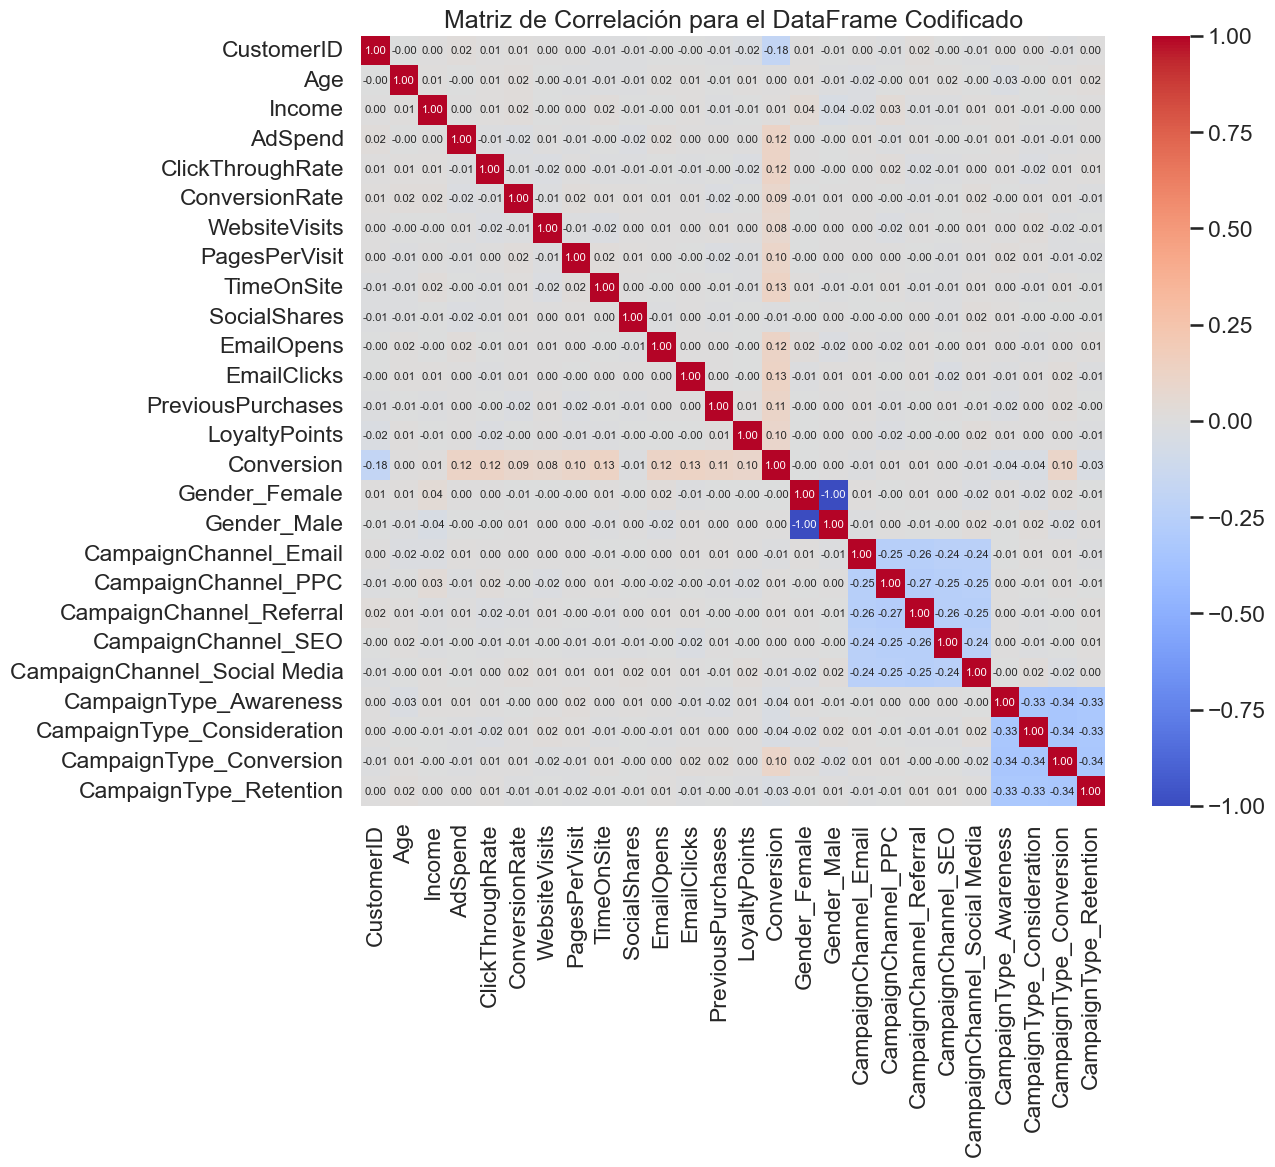

In [54]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con números
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Matriz de Correlación para el DataFrame Codificado')
plt.show()



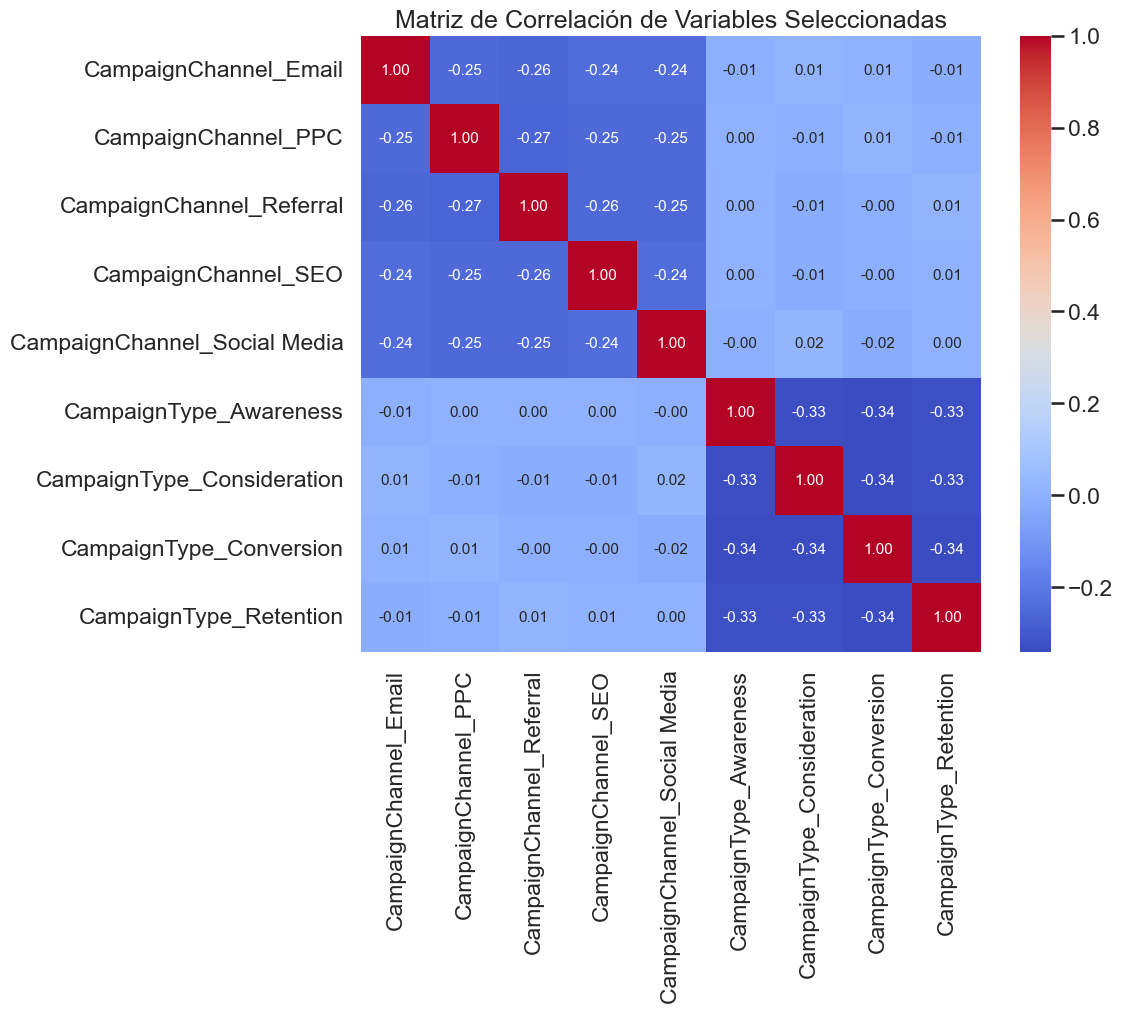

In [55]:
# Seleccionar las columnas específicas
selected_columns = [
    'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral',
    'CampaignChannel_SEO', 'CampaignChannel_Social Media',
    'CampaignType_Awareness', 'CampaignType_Consideration',
    'CampaignType_Conversion', 'CampaignType_Retention'
]

# Filtrar el DataFrame para incluir solo estas columnas
filtered_df = df_encoded[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = filtered_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 11})
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()


C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [12:54:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


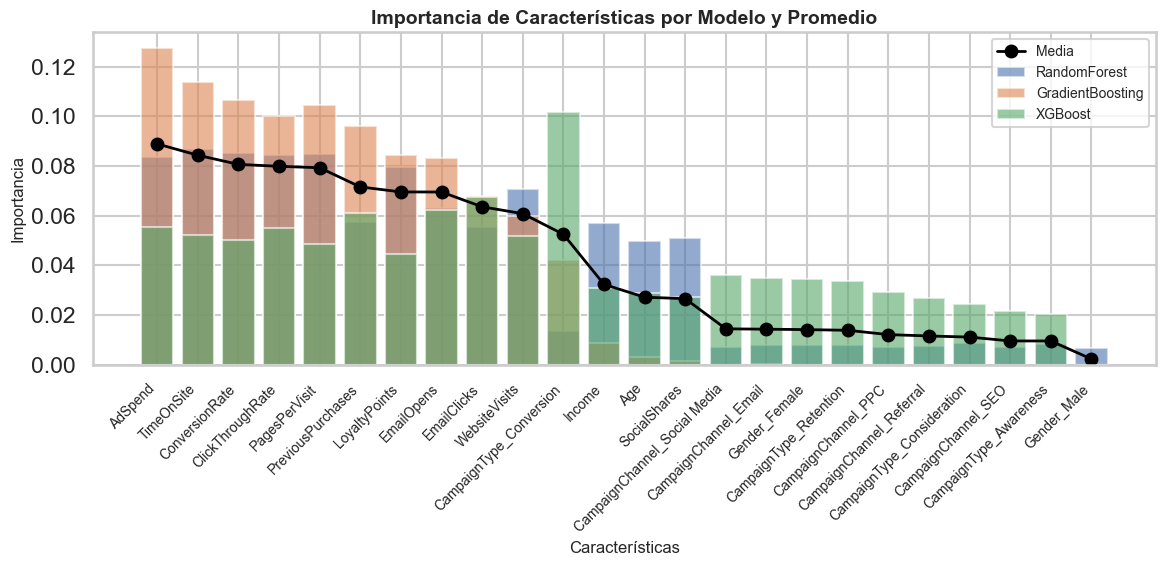

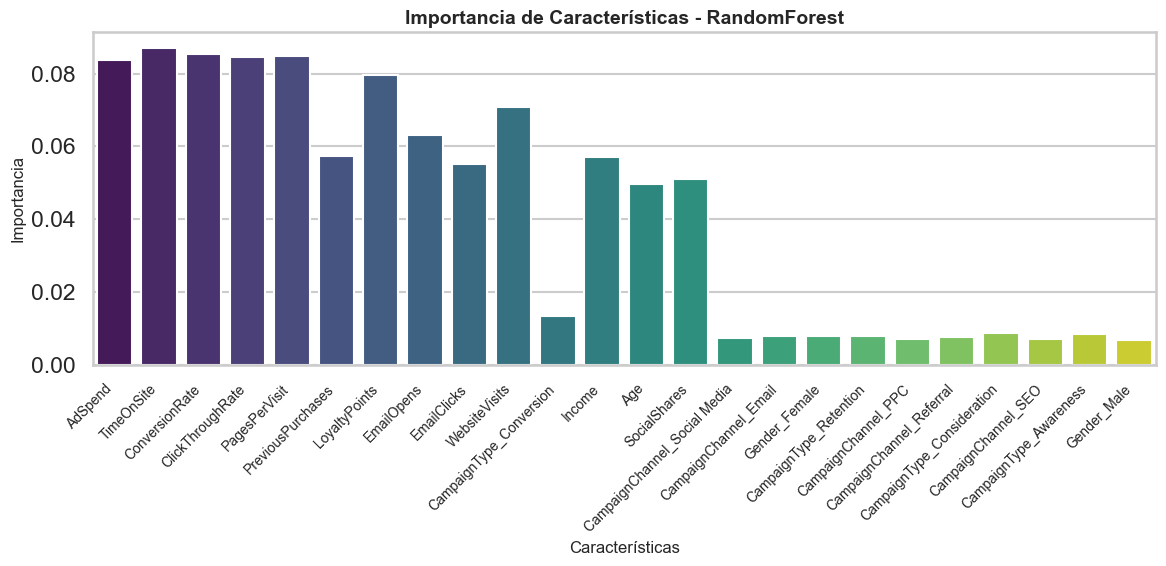

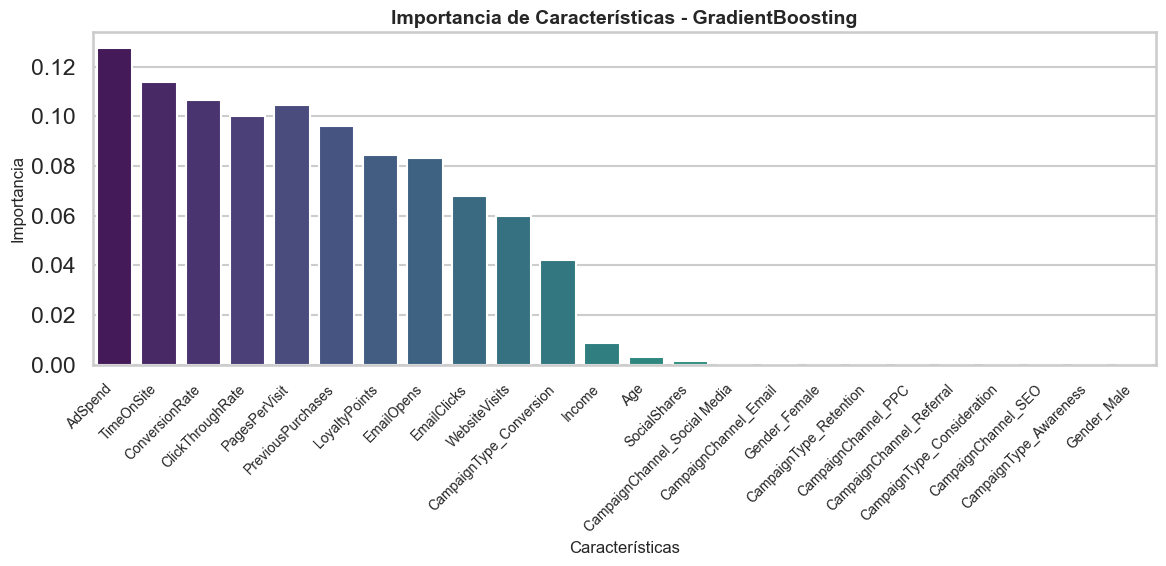

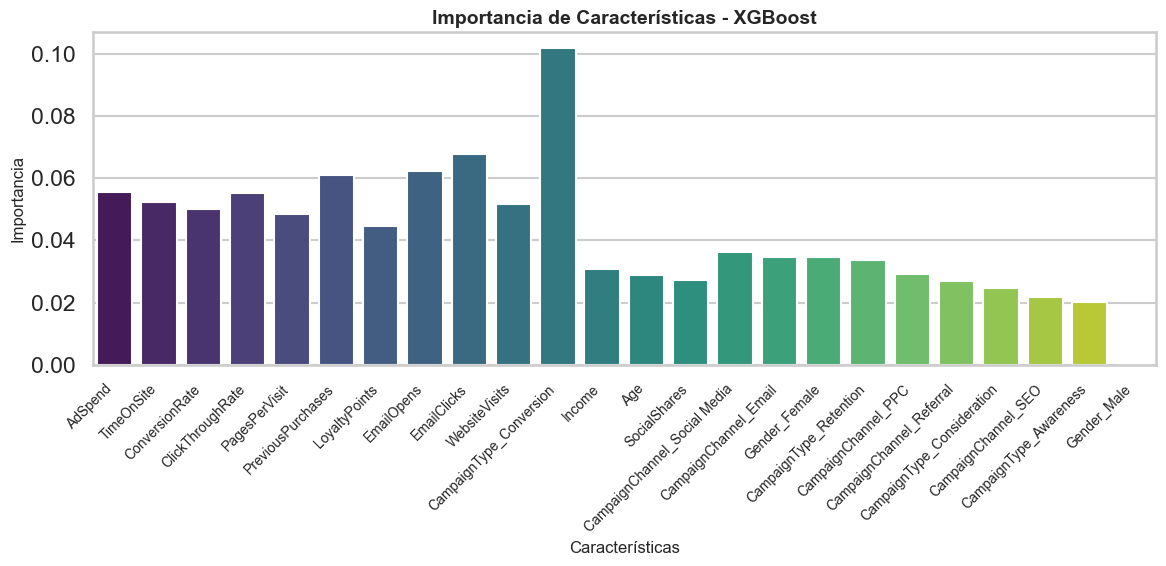

Tabla de Importancias:
                              RandomForest  GradientBoosting   XGBoost  \
AdSpend                           0.083679      1.274742e-01  0.055600   
TimeOnSite                        0.087030      1.137714e-01  0.052257   
ConversionRate                    0.085287      1.066993e-01  0.050030   
ClickThroughRate                  0.084508      9.995577e-02  0.055226   
PagesPerVisit                     0.084894      1.044235e-01  0.048621   
PreviousPurchases                 0.057507      9.621865e-02  0.061082   
LoyaltyPoints                     0.079578      8.458579e-02  0.044560   
EmailOpens                        0.063134      8.310349e-02  0.062417   
EmailClicks                       0.055275      6.786491e-02  0.067645   
WebsiteVisits                     0.070845      5.993758e-02  0.051717   
CampaignType_Conversion           0.013449      4.231524e-02  0.101807   
Income                            0.057237      8.944193e-03  0.030890   
Age            

In [56]:
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Conversion', 'CustomerID'])
y = df_encoded['Conversion']

# Modelos a usar
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Entrenar cada modelo y calcular importancia de características
importances_dict = {}
for model_name, model in models.items():
    model.fit(X, y)
    importances_dict[model_name] = model.feature_importances_

# Crear un DataFrame con las importancias
importances_df = pd.DataFrame(importances_dict, index=X.columns)

# Calcular la media de importancias
importances_df['Mean_Importance'] = importances_df.mean(axis=1)

# Ordenar por importancia media
importances_df = importances_df.sort_values(by='Mean_Importance', ascending=False)

# Gráfico combinado de importancias
plt.figure(figsize=(12, 6))

# Graficar las importancias de cada modelo
for model_name in models.keys():
    plt.bar(importances_df.index, importances_df[model_name], alpha=0.6, label=model_name)

# Graficar la media de importancias como una línea
plt.plot(importances_df['Mean_Importance'], color='black', marker='o', linestyle='-', linewidth=2, label='Media')

# Ajustar el gráfico combinado
plt.title('Importancia de Características por Modelo y Promedio', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Importancia', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Gráficos individuales por modelo
for model_name in models.keys():
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=importances_df.index,
        y=importances_df[model_name],
        palette="viridis",
    )
    plt.title(f'Importancia de Características - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Características', fontsize=12)
    plt.ylabel('Importancia', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()
    plt.show()

# Mostrar la tabla de importancias
print("Tabla de Importancias:")
print(importances_df)


### **Análisis y Estrategia para Optimización de Campañas**

---

#### **1. Análisis de la Campaña Actual**
El diseño de las campañas actuales revela una falta de enfoque estratégico en varios niveles, lo que reduce la efectividad de las iniciativas de marketing. Los principales problemas identificados son:

- **Campaña Generalista:**  
  Los esfuerzos de marketing no están segmentados ni adaptados a grupos específicos de clientes. Esto genera una asignación uniforme de recursos y un impacto limitado en la conversión de clientes potenciales.  

- **Distribución Ineficiente de Recursos (`AdSpend`):**  
  El presupuesto publicitario se reparte de manera homogénea entre hombres y mujeres, así como entre los diferentes canales publicitarios (`CampaignChannel`) y tipos de campañas (`CampaignType`). Esto implica que no se priorizan los canales o campañas que podrían ofrecer un mayor retorno de inversión (ROI).

- **Definición Amplia de Conversión:**  
  La conversión está definida de manera general como cualquier interacción deseada de marketing (como referencias, compras repetidas, entre otras). Esto dificulta identificar los factores específicos que impulsan cada tipo de conversión, diluyendo el enfoque de las estrategias.

---

#### **2. Oportunidad para Optimización**
La situación actual, aunque carece de enfoque específico, proporciona una valiosa oportunidad para:

- **Elaborar un Predictor de Conversiones:**  
  Aprovechando las características disponibles en el dataset, es posible construir un modelo predictivo que permita identificar los factores clave asociados con una mayor probabilidad de conversión.  
  Esto facilitará una segmentación más precisa y estrategias de marketing dirigidas.  

- **Segmentación Eficiente:**  
  Utilizar métricas relevantes para identificar grupos de clientes (como ingresos, comportamiento en el sitio web, interacción con correos electrónicos, entre otros) y diseñar campañas que respondan específicamente a sus necesidades.  

---

#### **3. Estrategia para Optimización**
Para optimizar las campañas, se propone lo siguiente:

1. **Segmentación Basada en Datos:**
   - Analizar variables como `Gender`, `CampaignChannel`, `CampaignType` y métricas de interacción (`ClickThroughRate`, `PagesPerVisit`) para identificar patrones que permitan agrupar a los clientes.
   - Priorizar recursos hacia segmentos con mayor probabilidad de conversión.

2. **Redefinir el Objetivo de Conversión:**
   - Dividir la conversión en categorías específicas (como compras repetidas, recomendaciones, interacción con anuncios) para crear predictores específicos para cada tipo de acción.

3. **Optimización de Recursos (`AdSpend`):**
   - Calcular la relación entre el gasto publicitario y las conversiones logradas en cada segmento. Ajustar el presupuesto para maximizar el ROI en canales y tipos de campañas con mejor desempeño.

4. **Canales Publicitarios Prioritarios:**
   - **`PPC`:** Orientar hacia clientes con ingresos altos para maximizar la probabilidad de compra.  
   - **`Referral`:** Enfocar en clientes leales con altas tasas de referencias para expandir la base de clientes.  
   - **`Social Media`:** Focalizar en usuarios jóvenes y comprometidos para generar conocimiento de marca.  

---

#### **4. Modelo Predictivo para Conversiones**
A partir de los datos disponibles, se identifican las siguientes variables clave que impulsan las conversiones:

1. **Variables de Comportamiento del Cliente:**
   - `ClickThroughRate`, `PagesPerVisit`, `TimeOnSite`, `SocialShares`.  

2. **Historial del Cliente:**
   - `PreviousPurchases`, `LoyaltyPoints`.

3. **Interacción con Email Marketing:**
   - `EmailOpens`, `EmailClicks`.

4. **Canales y Tipos de Campaña:**
   - `CampaignChannel` y `CampaignType` pueden ayudar a identificar la efectividad de cada estrategia.

---

#### **Conclusión**
El análisis y las estrategias propuestas permiten transformar una campaña generalista en un conjunto de iniciativas dirigidas y personalizadas. La clave está en:
- Segmentar a los clientes con base en su comportamiento y características específicas.
- Redefinir la conversión para entender mejor el impacto de las campañas.
- Optimizar la asignación de recursos (`AdSpend`) hacia los canales y tipos de campaña con mayor probabilidad de éxito.

Esto conducirá a un mejor retorno de inversión (ROI) y una mejora significativa en las tasas de conversión.


### **Cálculo de ClickThroughRate (CTR) y ConversionRate**

---

#### **ClickThroughRate (CTR)**
El **`ClickThroughRate (CTR)`** mide el porcentaje de personas que hacen clic en un anuncio en relación con la cantidad de veces que el anuncio se muestra (impresiones). Se calcula como:

CTR = (Número de clics / Número de impresiones) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**
   Clics = CTR × Impresiones totales

2. **Relación con ConversionRate:**
   Una vez calculados los clics, estos se pueden usar para determinar el `ConversionRate`:
   ConversionRate = (Conversiones / Clics) × 100

---

#### **ConversionRate**
El **`ConversionRate`** mide el porcentaje de clics que resultan en acciones deseadas (e.g., compras, registros). Se calcula como:

ConversionRate = (Conversiones / Total de clics) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**
   Clics = ClickThroughRate × Impresiones totales

2. **Conversiones estimadas:**
   ConversionRate = Conversiones / Clics

---

### **Limitaciones para Confirmar los Cálculos**
1. **Número de impresiones:**  
   Este dato no está presente en el dataset, lo que impide calcular directamente los clics reales desde el CTR.
2. **Número de conversiones reales:**  
   Aunque la descripción indica que el `ConversionRate` está vinculado a las acciones deseadas logradas, no hay detalles sobre las conversiones exactas por usuario o campaña.

---

### **Conclusión**
- **CTR** mide la efectividad inicial del anuncio en generar clics.
- **ConversionRate** mide la efectividad de los clics en generar acciones deseadas.
- Sin el número de impresiones y conversiones específicas, no es posible calcular estas métricas desde cero.
- Ambos valores (`CTR` y `ConversionRate`) ya procesados en el dataset son métricas clave para modelos de Machine Learning y análisis predictivo.


In [57]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Calcular class_weight para modelos que lo admitan
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Modelos y parámetros
models = {
    "RandomForest": RandomForestClassifier(class_weight=class_weights_dict, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=class_weights_dict[1] / class_weights_dict[0], random_state=42),
}

param_grids = {
    "RandomForest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [10, 20, None],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 4],
    },
    "GradientBoosting": {
        "classifier__n_estimators": [50, 100],
        "classifier__learning_rate": [0.01, 0.1],
        "classifier__max_depth": [3, 5],
        "classifier__subsample": [0.6, 0.8, 1.0],
    },
    "XGBoost": {
        "classifier__n_estimators": [50, 100],
        "classifier__learning_rate": [0.01, 0.1],
        "classifier__max_depth": [3, 5],
        "classifier__subsample": [0.6, 0.8],
    },
}

# Almacenar resultados
all_results = []

# Crear pipelines y ajustar modelos
for model_name, model in models.items():
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),  # Escalado
            ("classifier", model),  # Modelo
        ]
    )

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring="recall",
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
    )

    grid_search.fit(X_train_balanced, y_train_balanced)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Resultados
    recall_train = recall_score(y_train_balanced, best_model.predict(X_train_balanced))
    recall_test = recall_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Guardar modelo
    joblib.dump(best_model, f"{model_name}_best_model.pkl")

    # Guardar resultados
    all_results.append(
        {
            "Model": model_name,
            "Recall (Train)": recall_train,
            "Recall (Test)": recall_test,
            "Precision (Test)": precision_test,
            "F1-Score (Test)": f1_test,
            "ROC-AUC (Test)": roc_auc_test,
            "Confusion Matrix": cm,
        }
    )

# Stacking Classifier
estimators = [(name, joblib.load(f"{name}_best_model.pkl").named_steps["classifier"]) for name in models.keys()]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
stacking_clf.fit(X_train_balanced, y_train_balanced)

y_pred_stack = stacking_clf.predict(X_test)
y_pred_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]
recall_train_stack = recall_score(y_train_balanced, stacking_clf.predict(X_train_balanced))
recall_test_stack = recall_score(y_test, y_pred_stack)
precision_test_stack = precision_score(y_test, y_pred_stack)
f1_test_stack = f1_score(y_test, y_pred_stack)
roc_auc_test_stack = roc_auc_score(y_test, y_pred_proba_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)

# Guardar resultados Stacking
all_results.append(
    {
        "Model": "StackingClassifier",
        "Recall (Train)": recall_train_stack,
        "Recall (Test)": recall_test_stack,
        "Precision (Test)": precision_test_stack,
        "F1-Score (Test)": f1_test_stack,
        "ROC-AUC (Test)": roc_auc_test_stack,
        "Confusion Matrix": cm_stack,
    }
)
joblib.dump(stacking_clf, "StackingClassifier_best_model.pkl")

# Mostrar resultados
df_results = pd.DataFrame(all_results)
print("\nResultados finales:")
print(df_results)

# Mostrar matrices de confusión
for result in all_results:
    print(f"\nMatriz de Confusión para {result['Model']}:\n{result['Confusion Matrix']}")



Resultados finales:
                Model  Recall (Train)  Recall (Test)  Precision (Test)  \
0        RandomForest        1.000000       0.977889          0.887953   
1    GradientBoosting        0.992460       0.987161          0.912929   
2             XGBoost        0.810556       0.760342          0.952636   
3  StackingClassifier        0.997738       0.969330          0.894668   

   F1-Score (Test)  ROC-AUC (Test)          Confusion Matrix  
0         0.930754        0.739404   [[25, 173], [31, 1371]]  
1         0.948595        0.798416   [[66, 132], [18, 1384]]  
2         0.845696        0.790609  [[145, 53], [336, 1066]]  
3         0.930503        0.642491   [[38, 160], [43, 1359]]  

Matriz de Confusión para RandomForest:
[[  25  173]
 [  31 1371]]

Matriz de Confusión para GradientBoosting:
[[  66  132]
 [  18 1384]]

Matriz de Confusión para XGBoost:
[[ 145   53]
 [ 336 1066]]

Matriz de Confusión para StackingClassifier:
[[  38  160]
 [  43 1359]]


In [58]:
# Número de registros originales en el conjunto de entrenamiento
original_train_size = len(X_train)

# Número de registros después de aplicar SMOTE + Tomek Links
balanced_train_size = len(X_train_balanced)

# Mostrar resultados
print(f"Registros originales en el conjunto de entrenamiento: {original_train_size}")
print(f"Registros después de SMOTE + Tomek Links (balanceados): {balanced_train_size}")
print(f"Registros totales utilizados en el entrenamiento: {balanced_train_size}")


Registros originales en el conjunto de entrenamiento: 6400
Registros después de SMOTE + Tomek Links (balanceados): 10610
Registros totales utilizados en el entrenamiento: 10610


# Evaluación del Desempeño de los Modelos

A continuación, se presenta un análisis detallado del desempeño de los modelos:

---

## **1. RandomForest**
- **Ventajas:**
  - Excelente desempeño en el entrenamiento (**Recall Train = 1.0**), indicando que captura bien la distribución de los datos.
  - Buen Recall en el conjunto de prueba (**0.9779**), lo que sugiere que identifica correctamente la mayoría de las conversiones.
- **Desventajas:**
  - La matriz de confusión muestra una cantidad significativa de falsos negativos (**173**). Esto podría ser problemático si el enfoque es minimizar errores en la clase minoritaria.
  - **ROC-AUC bajo (0.7394)**, lo que indica que el modelo tiene problemas en clasificaciones más allá del umbral fijo.

---

## **2. GradientBoosting**
- **Ventajas:**
  - Mejor equilibrio entre Recall y Precision en el conjunto de prueba (**F1-Score Test = 0.9486**).
  - Mejor **ROC-AUC (0.7984)** entre los modelos, lo que indica un buen desempeño global a distintos umbrales de clasificación.
  - Matriz de confusión con pocos falsos negativos (**18**), lo que sugiere que este modelo es confiable para identificar conversiones.
- **Desventajas:**
  - Menor capacidad para generalizar (**Recall Train = 0.9925 frente a Test = 0.9872**), aunque la diferencia es pequeña.

---

## **3. XGBoost**
- **Ventajas:**
  - Alta precisión en el conjunto de prueba (**Precision Test = 0.9526**), lo que significa que los valores positivos predichos son confiables.
  - **ROC-AUC decente (0.7906)**, indicando que es robusto en distintas condiciones de clasificación.
- **Desventajas:**
  - Recall bajo en el conjunto de prueba (**0.7603**), lo que indica que pierde muchas conversiones reales.
  - Matriz de confusión muestra **336 falsos negativos**, lo que puede ser inaceptable en un entorno donde la clase positiva es prioritaria.

---

## **4. StackingClassifier**
- **Ventajas:**
  - Combina las fortalezas de los otros modelos, logrando un buen balance entre Recall (**Test = 0.9693**) y Precision (**Test = 0.8947**).
  - Buen **F1-Score (0.9305)**, lo que indica un balance general entre Precision y Recall.
  - Matriz de confusión con **43 falsos negativos**, un desempeño intermedio entre GradientBoosting y RandomForest.
- **Desventajas:**
  - **ROC-AUC relativamente bajo (0.6425)**, lo que sugiere problemas en la clasificación más allá del umbral fijo.

---

## **Conclusión**
1. **GradientBoosting** es el mejor modelo en términos de Recall, Precision y ROC-AUC. Su bajo número de falsos negativos lo hace ideal si la clase positiva (conversiones) es crítica.
2. **RandomForest** tiene un buen desempeño general, pero podría mejorar en Precision y ROC-AUC.
3. **XGBoost** se destaca en Precision pero tiene un Recall bajo, lo que lo hace menos adecuado si el objetivo es minimizar falsos negativos.
4. **StackingClassifier** es un buen compromiso entre todos los modelos, pero su bajo ROC-AUC puede ser un problema en ciertas aplicaciones.

---

## **Recomendaciones**
1. **Si el foco está en maximizar el Recall:** Usar **GradientBoosting**.
2. **Si se requiere un balance entre Precision y Recall:** Usar **StackingClassifier**.
3. **Si se prefiere una mayor interpretabilidad y simplicidad:** Usar **RandomForest**.


# ¿Por qué usar Recall y no otras métricas?

El uso del **Recall** como métrica principal depende del objetivo del problema y de las consecuencias asociadas a los errores de clasificación. En este caso, el Recall es relevante porque:

---

## **1. Contexto del Problema**
El objetivo parece ser maximizar las **conversiones** predichas correctamente (minimizar los **falsos negativos**). Esto es importante porque:

- **Conversión (clase positiva):** Representa clientes que realizan una acción deseada (e.g., compra, registro).
- Perder una conversión real (**falso negativo**) puede significar una pérdida de oportunidad de ingresos o de impacto comercial.

---

## **2. Definición de Recall**
El Recall mide qué proporción de los casos positivos reales fueron identificados correctamente:

\[
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]

- **Alto Recall:** Significa que estamos capturando la mayoría de las conversiones reales.
- **Bajo Recall:** Indica que estamos perdiendo muchas conversiones reales, lo cual puede ser inaceptable si estas son críticas para el negocio.

---

## **3. Comparación con otras métricas**

### **Precision**
- **Qué mide:** La proporción de predicciones positivas que son correctas.
- **Útil cuando:** Es más importante evitar falsos positivos que identificar todos los positivos.
- **Por qué no usarlo aquí:** No es la prioridad porque no es tan crítico si identificamos algunas conversiones incorrectas mientras capturamos la mayoría de las reales.

### **Accuracy**
- **Qué mide:** La proporción total de predicciones correctas.
- **Limitación:** Puede ser engañosa en problemas desbalanceados como este, donde la clase negativa es mucho más frecuente. Un modelo que prediga siempre "no conversión" tendría alta Accuracy pero no resolvería el problema.

### **F1-Score**
- **Qué mide:** Es el balance entre Precision y Recall.
- **Útil cuando:** Ambos errores (falsos positivos y falsos negativos) tienen consecuencias significativas.
- **Complemento:** Puede ser útil como métrica adicional, pero en este caso, el Recall tiene más peso.

### **ROC-AUC**
- **Qué mide:** El desempeño global del modelo a través de distintos umbrales.
- **Útil para:** Evaluar el balance global del modelo, pero no mide directamente el éxito en identificar conversiones reales.

---

## **4. Justificación Específica**
Elegir **Recall** es adecuado si:
1. **El impacto de los falsos negativos es alto:** Perder conversiones reales puede ser costoso.
2. **Existe tolerancia a falsos positivos:** Si el costo de un falso positivo (predecir conversión cuando no ocurre) es bajo, podemos priorizar Recall sobre Precision.

---

## **Conclusión**
En este problema, **maximizar Recall asegura que se capturen tantas conversiones reales como sea posible**. Sin embargo, se puede complementar con otras métricas (como F1-Score o ROC-AUC) para garantizar un equilibrio adecuado entre Precision y Recall si también se busca evitar falsos positivos.


hacer segmentacion de clientes con kmeans

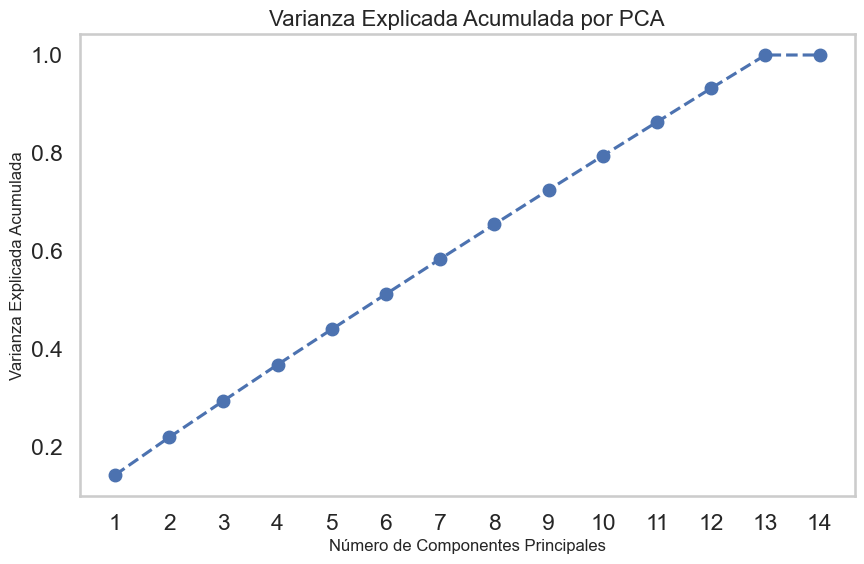


Cargas de las variables en cada componente principal:
               Age  Gender_Male  Gender_Female        Income  \
PC1   1.515785e-02    -0.705368       0.705368  5.862705e-02   
PC2  -1.898230e-02    -0.018109       0.018109 -3.055552e-01   
PC3   6.640322e-01     0.014916      -0.014916  1.993839e-01   
PC4   9.641792e-02     0.009440      -0.009440  6.422610e-02   
PC5  -1.547597e-01     0.022798      -0.022798  4.281066e-01   
PC6   1.012655e-01    -0.001933       0.001933  1.632964e-01   
PC7   8.903161e-02    -0.002285       0.002285  2.438204e-01   
PC8   9.687875e-02    -0.022897       0.022897 -5.233886e-01   
PC9  -1.486532e-02    -0.012018       0.012018  2.488047e-02   
PC10  1.412996e-01     0.009356      -0.009356  1.968994e-01   
PC11 -2.042593e-02    -0.020307       0.020307 -3.575383e-01   
PC12  6.350619e-01     0.001301      -0.001301 -2.751373e-01   
PC13 -2.715694e-01    -0.010814       0.010814 -2.703190e-01   
PC14 -1.302524e-16     0.707107       0.707107 -3

In [59]:
# Filtrar las columnas relevantes
variables_cluster = ["Age", "Gender_Male", "Gender_Female","Income", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases","LoyaltyPoints"]
data_pca = df_encoded[variables_cluster]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Aplicar PCA
pca = PCA(n_components=len(variables_cluster))  # Crear tantos componentes como variables
pca.fit(data_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variables_cluster) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada por PCA', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.xticks(range(1, len(variables_cluster) + 1))
plt.grid()
plt.show()

# Mostrar los pesos (cargas) de cada variable en los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=variables_cluster, index=[f'PC{i+1}' for i in range(len(variables_cluster))])

print("\nCargas de las variables en cada componente principal:")
print(pca_components)


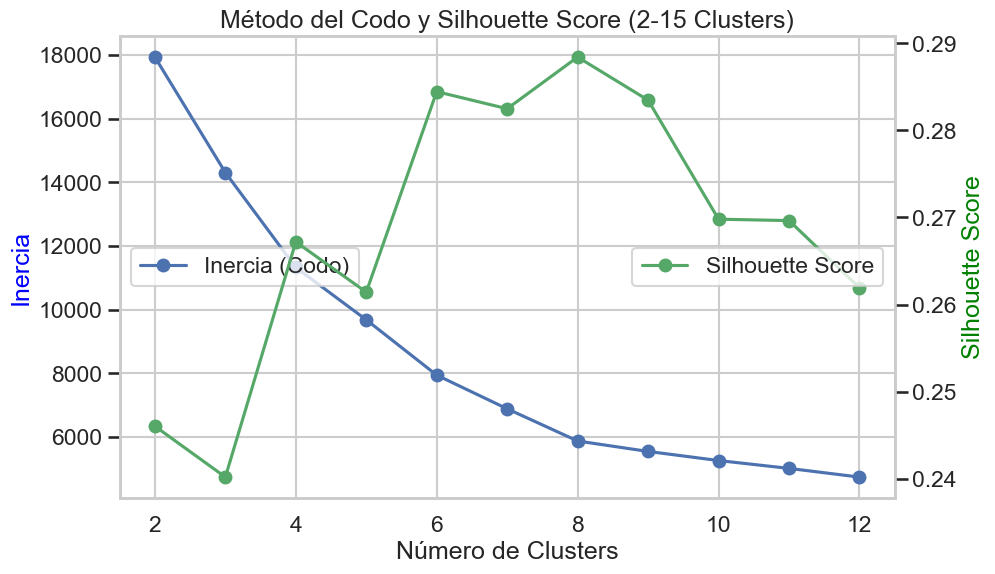

C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\2550927477.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3D[f"Cluster_{k}"] = kmeans.fit_predict(data_3D_scaled)



Tamaño de Clusters para k=8:
Cluster_8
0     993
1     995
2    1027
3    1050
4     996
5     976
6    1006
7     957
Name: count, dtype: int64


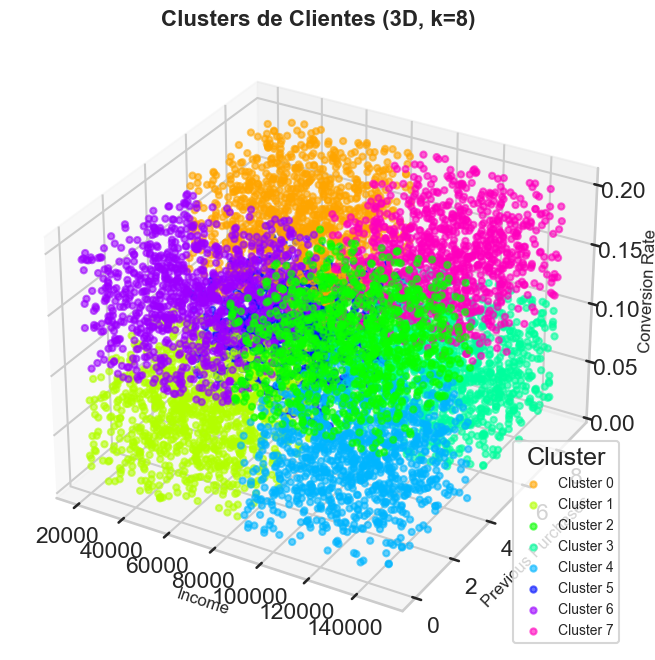

In [60]:
# Filtrar las columnas relevantes
data_3D = df_encoded[["Income", "PreviousPurchases", "ConversionRate"]]

# Escalar las variables para normalizar
scaler = StandardScaler()
data_3D_scaled = scaler.fit_transform(data_3D)

# Método del Codo y Silhouette Score
inertia = []
silhouette_scores = []
max_clusters = 12

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_3D_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_3D_scaled, kmeans.labels_))

# Gráfico combinado: Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(2, max_clusters + 1), inertia, 'o-b', label='Inercia (Codo)')
ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'o-g', label='Silhouette Score')

ax1.set_xlabel("Número de Clusters")
ax1.set_ylabel("Inercia", color="blue")
ax2.set_ylabel("Silhouette Score", color="green")
plt.title("Método del Codo y Silhouette Score (2-15 Clusters)")
ax1.legend(loc="center left")
ax2.legend(loc="center right")
plt.grid()
plt.show()

# Análisis de clusters adicionales (k=8 a k=8)
for k in range(8, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_3D[f"Cluster_{k}"] = kmeans.fit_predict(data_3D_scaled)

    # Tamaño de cada cluster
    cluster_sizes = data_3D[f"Cluster_{k}"].value_counts().sort_index()
    print(f"\nTamaño de Clusters para k={k}:\n{cluster_sizes}")

    # Gráfico 3D para el número de clusters elegido
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    colors = sns.color_palette("hsv", k)

    for cluster in range(k):
        cluster_data_3D = data_3D[data_3D[f"Cluster_{k}"] == cluster]
        ax.scatter(
            cluster_data_3D["Income"],
            cluster_data_3D["PreviousPurchases"],
            cluster_data_3D["ConversionRate"],
            label=f"Cluster {cluster}",
            color=colors[cluster],
            alpha=0.6
        )

    ax.set_title(f"Clusters de Clientes (3D, k={k})", fontsize=16, fontweight="bold")
    ax.set_xlabel("Income", fontsize=12)
    ax.set_ylabel("Previous Purchases", fontsize=12)
    ax.set_zlabel("Conversion Rate", fontsize=12)
    ax.legend(title="Cluster", fontsize=10, loc="best")
    plt.show()


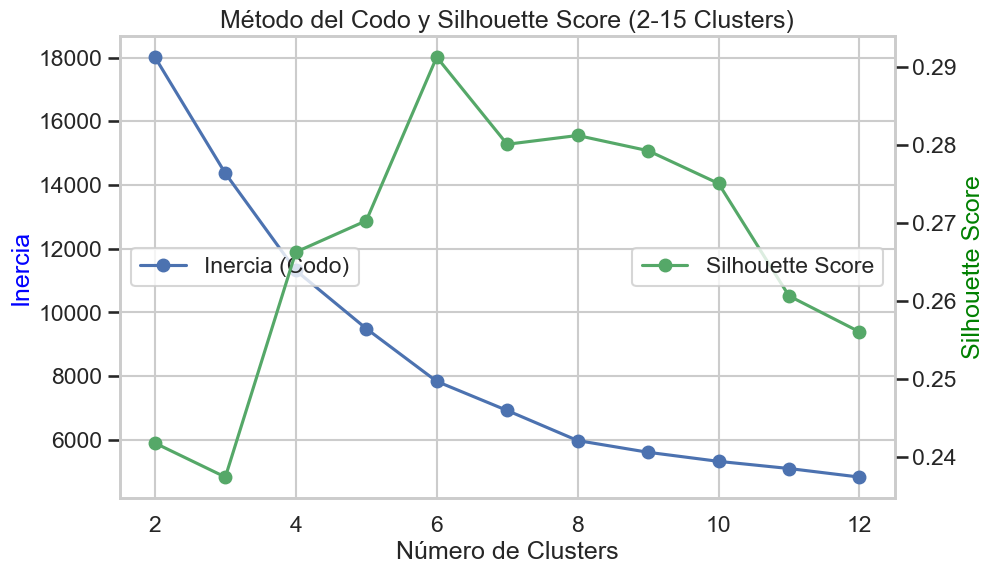

C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\2568892977.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3D_2[f"Cluster_{k}"] = kmeans.fit_predict(data_3D_2_scaled)



Tamaño de Clusters para k=6:
Cluster_6
0    1320
1    1273
2    1394
3    1287
4    1373
5    1353
Name: count, dtype: int64


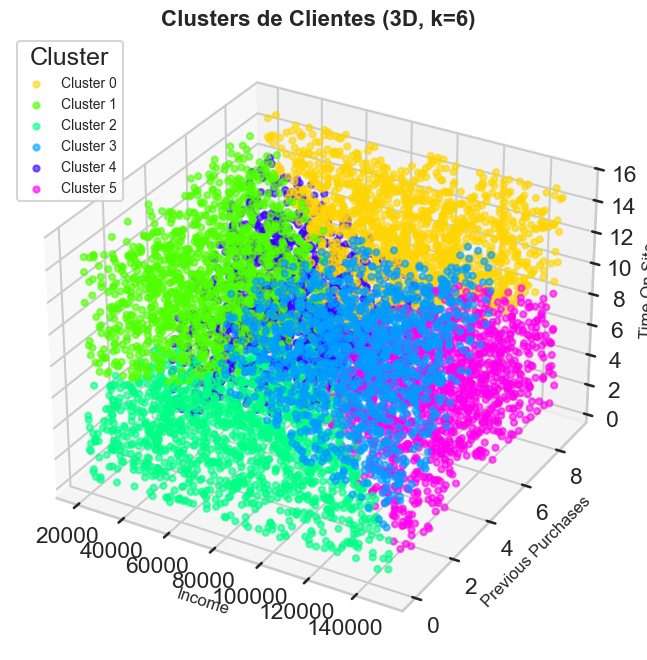

In [61]:
# Filtrar las columnas relevantes
data_3D_2 = df_encoded[["Income", "PreviousPurchases", "TimeOnSite"]]

# Escalar las variables para normalizar
scaler = StandardScaler()
data_3D_2_scaled = scaler.fit_transform(data_3D_2)

# Método del Codo y Silhouette Score
inertia = []
silhouette_scores = []
max_clusters = 12

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_3D_2_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_3D_2_scaled, kmeans.labels_))

# Gráfico combinado: Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(2, max_clusters + 1), inertia, 'o-b', label='Inercia (Codo)')
ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'o-g', label='Silhouette Score')

ax1.set_xlabel("Número de Clusters")
ax1.set_ylabel("Inercia", color="blue")
ax2.set_ylabel("Silhouette Score", color="green")
plt.title("Método del Codo y Silhouette Score (2-15 Clusters)")
ax1.legend(loc="center left")
ax2.legend(loc="center right")
plt.grid()
plt.show()

# Análisis de clusters adicionales (k=8 a k=8)
for k in range(6, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_3D_2[f"Cluster_{k}"] = kmeans.fit_predict(data_3D_2_scaled)

    # Tamaño de cada cluster
    cluster_sizes = data_3D_2[f"Cluster_{k}"].value_counts().sort_index()
    print(f"\nTamaño de Clusters para k={k}:\n{cluster_sizes}")

    # Gráfico 3D para el número de clusters elegido
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    colors = sns.color_palette("hsv", k)

    for cluster in range(k):
        cluster_data_3D_2 = data_3D_2[data_3D_2[f"Cluster_{k}"] == cluster]
        ax.scatter(
            cluster_data_3D_2["Income"],
            cluster_data_3D_2["PreviousPurchases"],
            cluster_data_3D_2["TimeOnSite"],
            label=f"Cluster {cluster}",
            color=colors[cluster],
            alpha=0.6
        )

    ax.set_title(f"Clusters de Clientes (3D, k={k})", fontsize=16, fontweight="bold")
    ax.set_xlabel("Income", fontsize=12)
    ax.set_ylabel("Previous Purchases", fontsize=12)
    ax.set_zlabel("Time On Site", fontsize=12)
    ax.legend(title="Cluster", fontsize=10, loc="best")
    plt.show()

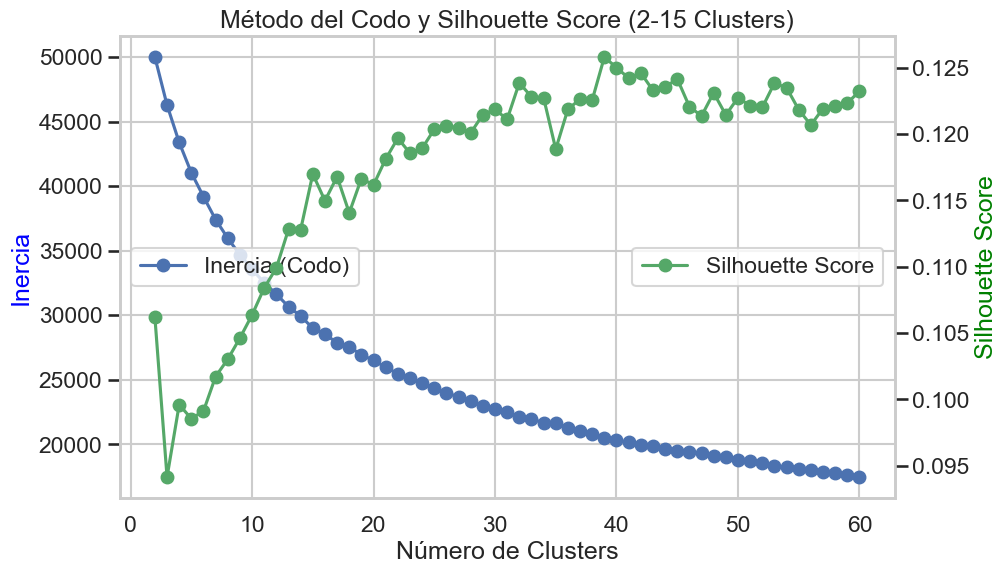

C:\Users\mikel\AppData\Local\Temp\ipykernel_28272\271306900.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster["Cluster"] = kmeans.fit_predict(data_scaled)


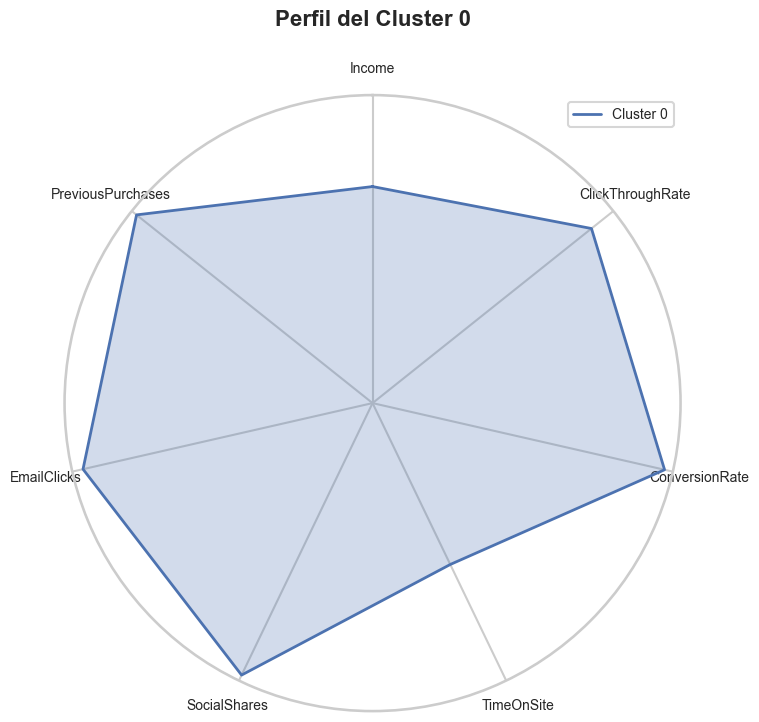

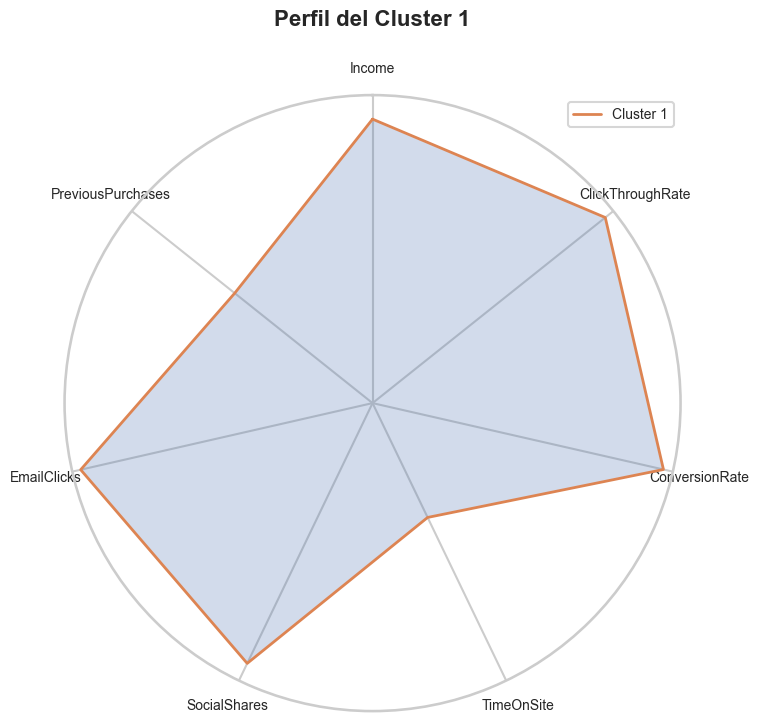

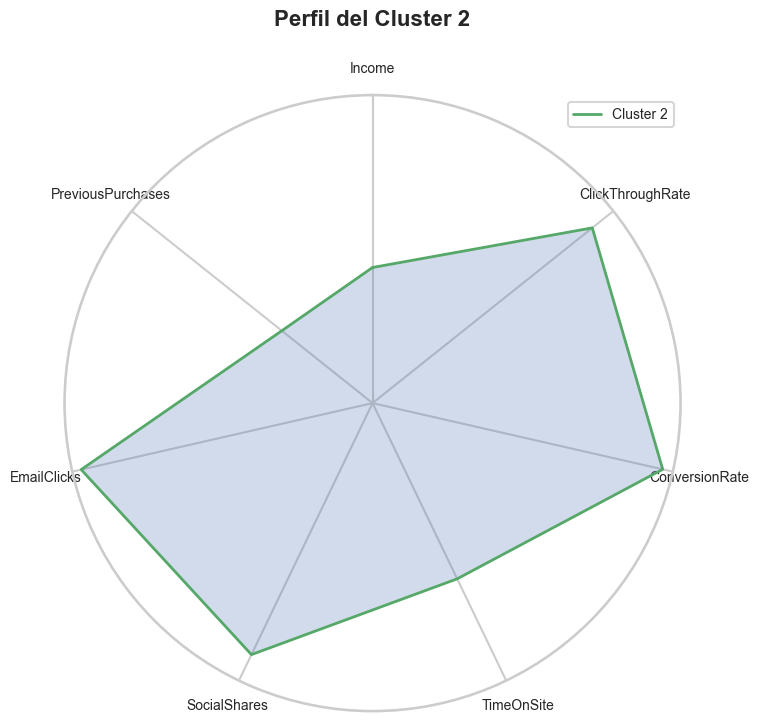

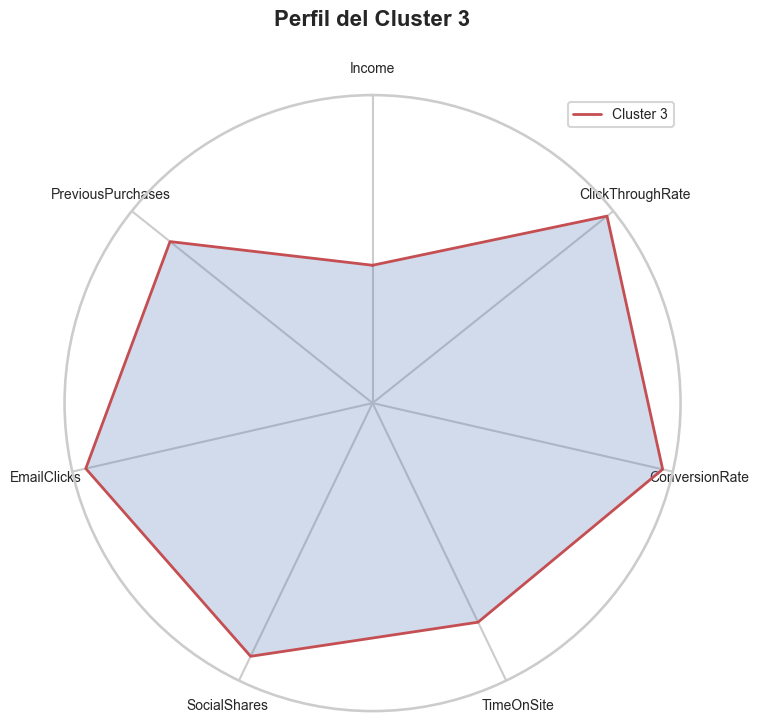

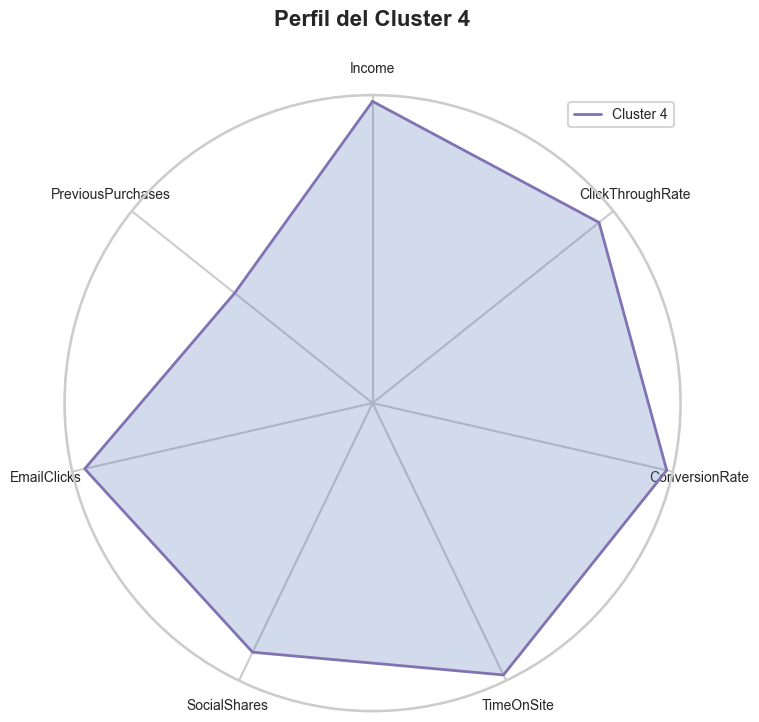

In [62]:
# Filtrar las columnas relevantes
variables_cluster = ["Income", "ClickThroughRate", "ConversionRate", "TimeOnSite", "SocialShares", "EmailClicks", "PreviousPurchases"]
data_cluster = df_encoded[variables_cluster]

# Escalar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Determinar el número óptimo de clusters con el método del codo y silhouette score
inertia = []
silhouette_scores = []
max_clusters = 60

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Gráfico combinado: Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(2, max_clusters + 1), inertia, 'o-b', label='Inercia (Codo)')
ax2.plot(range(2, max_clusters + 1), silhouette_scores, 'o-g', label='Silhouette Score')

ax1.set_xlabel("Número de Clusters")
ax1.set_ylabel("Inercia", color="blue")
ax2.set_ylabel("Silhouette Score", color="green")
plt.title("Método del Codo y Silhouette Score (2-15 Clusters)")
ax1.legend(loc="center left")
ax2.legend(loc="center right")
plt.grid()
plt.show()

# Elegir el número óptimo de clusters (por ejemplo, 6)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cluster["Cluster"] = kmeans.fit_predict(data_scaled)

# Crear promedios por cluster
cluster_means_scaled = data_cluster.groupby("Cluster").mean()

# Excluir la columna de 'Cluster' antes de desescalar
cluster_means_scaled = cluster_means_scaled[variables_cluster]

# Desescalar los promedios
cluster_means = pd.DataFrame(
    scaler.inverse_transform(cluster_means_scaled),
    columns=variables_cluster,
    index=cluster_means_scaled.index
)

# Normalizar los valores promedio desescalados
cluster_means_normalized = cluster_means / cluster_means.max()

# Spider Plot para cada cluster
categories = cluster_means.columns
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

for cluster in range(optimal_k):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Valores del cluster actual
    values = cluster_means_normalized.iloc[cluster].values.flatten().tolist()
    values += values[:1]  # Cerrar el círculo

    # Añadir datos del cluster
    ax.plot(angles, values, label=f"Cluster {cluster}", linewidth=2, color=f"C{cluster}")
    ax.fill(angles, values, alpha=0.25)

    # Configuración del gráfico
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([])
    ax.set_title(f"Perfil del Cluster {cluster}", size=16, fontweight="bold", y=1.1)

    # Leyenda
    ax.legend(loc="upper right", fontsize=10)
    plt.show()


In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

In [65]:
# Selección de columnas predictoras
predictor_columns = [
    "Age", "Income", "ClickThroughRate", "ConversionRate", "WebsiteVisits",
    "PagesPerVisit", "TimeOnSite", "SocialShares", "EmailOpens", "EmailClicks",
    "PreviousPurchases", "LoyaltyPoints", "Gender_Female", "Gender_Male"
]

# Variables objetivo
campaign_columns = ["CampaignType_Awareness", "CampaignType_Consideration", 
                    "CampaignType_Conversion", "CampaignType_Retention"]
channel_columns = ["CampaignChannel_Email", "CampaignChannel_PPC", 
                   "CampaignChannel_Referral", "CampaignChannel_SEO", 
                   "CampaignChannel_Social Media"]

# Predictores y objetivos
X = df_encoded[predictor_columns]
y_campaign = df_encoded[campaign_columns].idxmax(axis=1)
y_channel = df_encoded[channel_columns].idxmax(axis=1)
y_adspend = np.log1p(df_encoded["AdSpend"])  # Transformación logarítmica para AdSpend

# Codificar las etiquetas categóricas
label_encoder_campaign = LabelEncoder()
label_encoder_channel = LabelEncoder()

y_campaign_encoded = label_encoder_campaign.fit_transform(y_campaign)
y_channel_encoded = label_encoder_channel.fit_transform(y_channel)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train_campaign, y_test_campaign = train_test_split(
    X, y_campaign_encoded, test_size=0.2, stratify=y_campaign_encoded, random_state=42
)
X_train_ch, X_test_ch, y_train_channel, y_test_channel = train_test_split(
    X, y_channel_encoded, test_size=0.2, stratify=y_channel_encoded, random_state=42
)
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X, y_adspend, test_size=0.2, random_state=42
)

# Balancear clases con SMOTE
smote = SMOTE(random_state=42)
X_train_campaign_bal, y_train_campaign_bal = smote.fit_resample(X_train, y_train_campaign)
X_train_channel_bal, y_train_channel_bal = smote.fit_resample(X_train_ch, y_train_channel)

# Modelo para CampaignType
xgb_campaign = xgb.XGBClassifier(objective="multi:softmax", random_state=42)
param_grid_campaign = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}
grid_campaign = GridSearchCV(
    xgb_campaign, param_grid_campaign, scoring="f1_weighted", 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1
)
grid_campaign.fit(X_train_campaign_bal, y_train_campaign_bal)

best_campaign_model = grid_campaign.best_estimator_
y_pred_campaign_encoded = best_campaign_model.predict(X_test)

# Decodificar predicciones
y_pred_campaign = label_encoder_campaign.inverse_transform(y_pred_campaign_encoded)
y_test_campaign_decoded = label_encoder_campaign.inverse_transform(y_test_campaign)

# Reporte para CampaignType
print("Reporte de Clasificación para CampaignType:")
print(classification_report(y_test_campaign_decoded, y_pred_campaign))

# Modelo para Channel
xgb_channel = xgb.XGBClassifier(objective="multi:softmax", random_state=42)
param_grid_channel = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}
grid_channel = GridSearchCV(
    xgb_channel, param_grid_channel, scoring="f1_weighted", 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1
)
grid_channel.fit(X_train_channel_bal, y_train_channel_bal)

best_channel_model = grid_channel.best_estimator_
y_pred_channel_encoded = best_channel_model.predict(X_test_ch)

# Decodificar predicciones
y_pred_channel = label_encoder_channel.inverse_transform(y_pred_channel_encoded)
y_test_channel_decoded = label_encoder_channel.inverse_transform(y_test_channel)

# Reporte para Channel
print("Reporte de Clasificación para Channel:")
print(classification_report(y_test_channel_decoded, y_pred_channel))

# Modelo para AdSpend
scaler = StandardScaler()
X_train_ad_scaled = scaler.fit_transform(X_train_ad)
X_test_ad_scaled = scaler.transform(X_test_ad)

gbr_adspend = GradientBoostingRegressor(random_state=42)
param_grid_adspend = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}
grid_adspend = GridSearchCV(
    gbr_adspend, param_grid_adspend, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1
)
grid_adspend.fit(X_train_ad_scaled, y_train_ad)

best_adspend_model = grid_adspend.best_estimator_
y_pred_adspend = np.expm1(best_adspend_model.predict(X_test_ad_scaled))

# Evaluación para AdSpend
mae = mean_absolute_error(np.expm1(y_test_ad), y_pred_adspend)
mse = mean_squared_error(np.expm1(y_test_ad), y_pred_adspend)
print(f"MAE (AdSpend): {mae}")
print(f"MSE (AdSpend): {mse}")

# Guardar modelos
joblib.dump(best_campaign_model, "Best_CampaignType_Model.pkl")
joblib.dump(best_channel_model, "Best_Channel_Model.pkl")
joblib.dump(best_adspend_model, "Best_AdSpend_Model.pkl")

# Predicción para todos los clientes
df_encoded["Predicted_CampaignType"] = label_encoder_campaign.inverse_transform(best_campaign_model.predict(X))
df_encoded["Predicted_Channel"] = label_encoder_channel.inverse_transform(best_channel_model.predict(X))
df_encoded["Predicted_AdSpend"] = np.expm1(best_adspend_model.predict(scaler.transform(X)))

# Resultados finales
print("\nDistribución de CampaignType Predicho:")
print(df_encoded["Predicted_CampaignType"].value_counts())

print("\nDistribución de Canales Predichos:")
print(df_encoded["Predicted_Channel"].value_counts())

print("\nEstadísticas de AdSpend Predicho:")
print(df_encoded["Predicted_AdSpend"].describe())


Reporte de Clasificación para CampaignType:
                            precision    recall  f1-score   support

    CampaignType_Awareness       0.21      0.22      0.21       398
CampaignType_Consideration       0.22      0.21      0.21       398
   CampaignType_Conversion       0.28      0.30      0.29       415
    CampaignType_Retention       0.22      0.21      0.22       389

                  accuracy                           0.23      1600
                 macro avg       0.23      0.23      0.23      1600
              weighted avg       0.23      0.23      0.23      1600

Reporte de Clasificación para Channel:
                              precision    recall  f1-score   support

       CampaignChannel_Email       0.17      0.18      0.17       311
         CampaignChannel_PPC       0.19      0.19      0.19       331
    CampaignChannel_Referral       0.22      0.22      0.22       344
         CampaignChannel_SEO       0.21      0.21      0.21       310
CampaignChannel_Soc